# import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
import itertools
from pylab import rcParams
from matplotlib import pyplot

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# dataset reading

In [4]:
df = pd.read_excel(r"C:\Users\GOURAV\Downloads\Superstore.xls")
print(df.shape)

(9994, 21)


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
##null value checking
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# exploratory data analysis

In [7]:
Category_count=print(df['Category'].value_counts())
Category_count

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


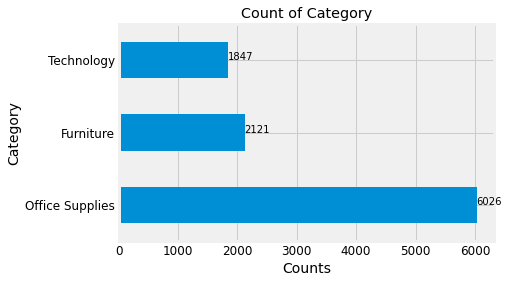

In [8]:
#plotting of catagory data
df['Category'].value_counts().plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Counts')
plt.title('Count of Category')
x=["Office Supplies","Furniture","Technology"]
y=[6026,2121,1847]
for index,value in enumerate(y):
    plt.text(value,index,str(value))

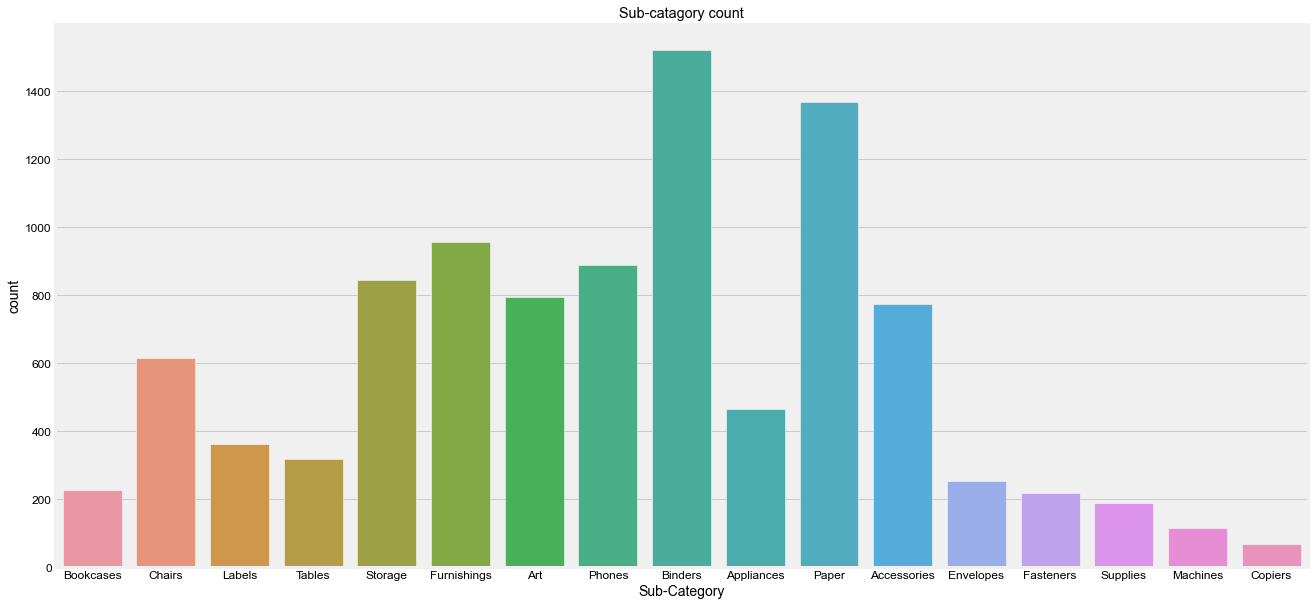

In [9]:
# try to visualize the 'SubCategory' column from the dataset.
plt.figure(figsize=(20,10))
plt.title("Sub-catagory count")
sns.set_style('whitegrid')
sns.countplot(x='Sub-Category',data=df)

Text(0.5, 1.0, 'segment count')

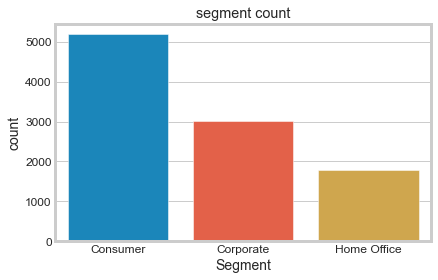

In [10]:
sns.countplot(x=df['Segment'])
plt.title('segment count')

Text(0.5, 1.0, 'region plot')

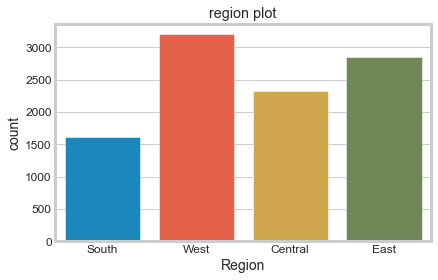

In [11]:
sns.countplot(x=df['Region'])
plt.title('region plot')

Text(0.5, 1.0, 'shipmode plot')

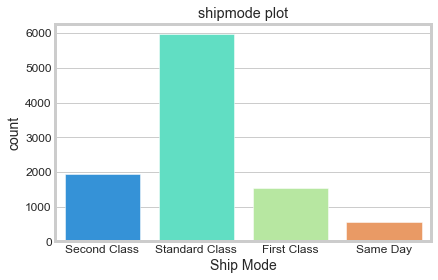

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df, palette='rainbow')
plt.title('shipmode plot')

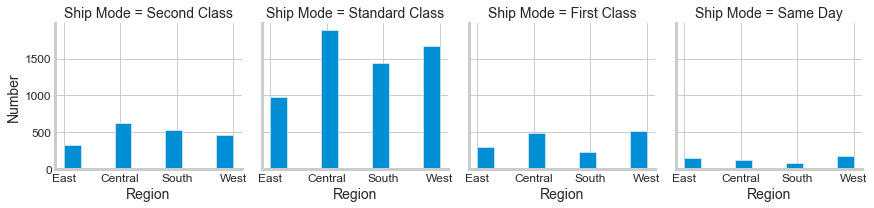

In [13]:
# try to visualize the 'Region' column from the Shipmode column dataset standpoints.
region_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')

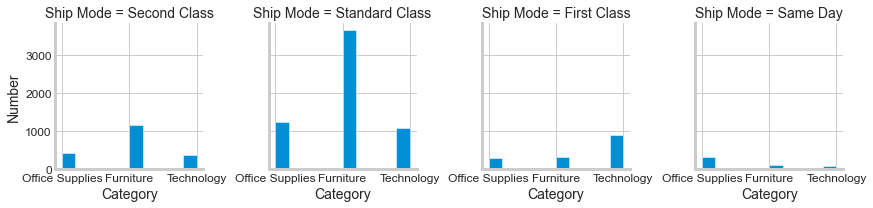

In [14]:
#try to visualize the 'Category' column from the Shipmode column dataset standpoints.
category_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')

Text(0.5, 1.0, 'Discount-Profit plot')

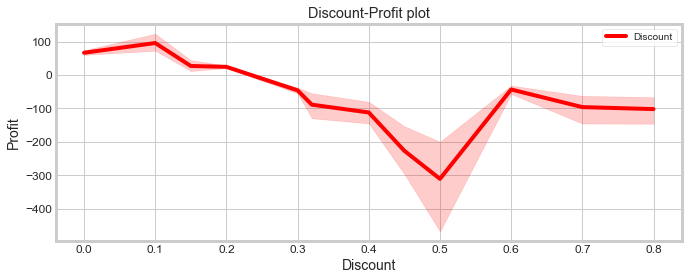

In [15]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df, color = 'r', label= 'Discount')
plt.legend()
plt.title('Discount-Profit plot')

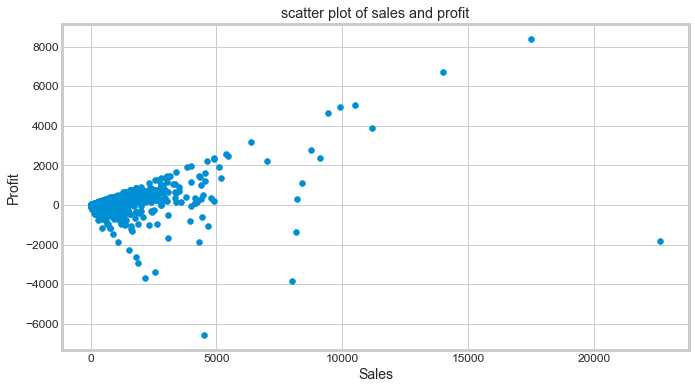

In [16]:
##SCATTER PLOT
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.title('scatter plot of sales and profit')
plt.show()

# data preparation

In [17]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [18]:
furniture = df.loc[df['Category'] == 'Furniture']
office_supplies = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']

In [19]:
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [20]:
print(office_supplies['Order Date'].min())
print(office_supplies['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [21]:
print(technology['Order Date'].min())
print(technology['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [22]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [23]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_supplies.drop(cols, axis=1, inplace=True)
office_supplies = office_supplies.sort_values('Order Date')

In [24]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')

In [25]:
##null value checking
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [26]:
office_supplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [27]:
technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [28]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [29]:
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [30]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [31]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [32]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [33]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

# data visualization

In [34]:
##furtinure Sales Pattern(monthly)
y1_mn = furniture['Sales'].resample('MS').mean()
mean_y1_mn=y1_mn.mean()
y1_zm_mn=y1_mn-mean_y1_mn
y1_zm_mn['2017':]

Order Date
2017-01-01   -386.479239
2017-02-01   -255.901573
2017-03-01   -239.409133
2017-04-01   -330.783468
2017-05-01   -105.779045
2017-06-01     42.378919
2017-07-01   -221.556516
2017-08-01     73.800516
2017-09-01    425.427211
2017-10-01     91.281355
2017-11-01    493.736386
2017-12-01    472.217299
Freq: MS, Name: Sales, dtype: float64

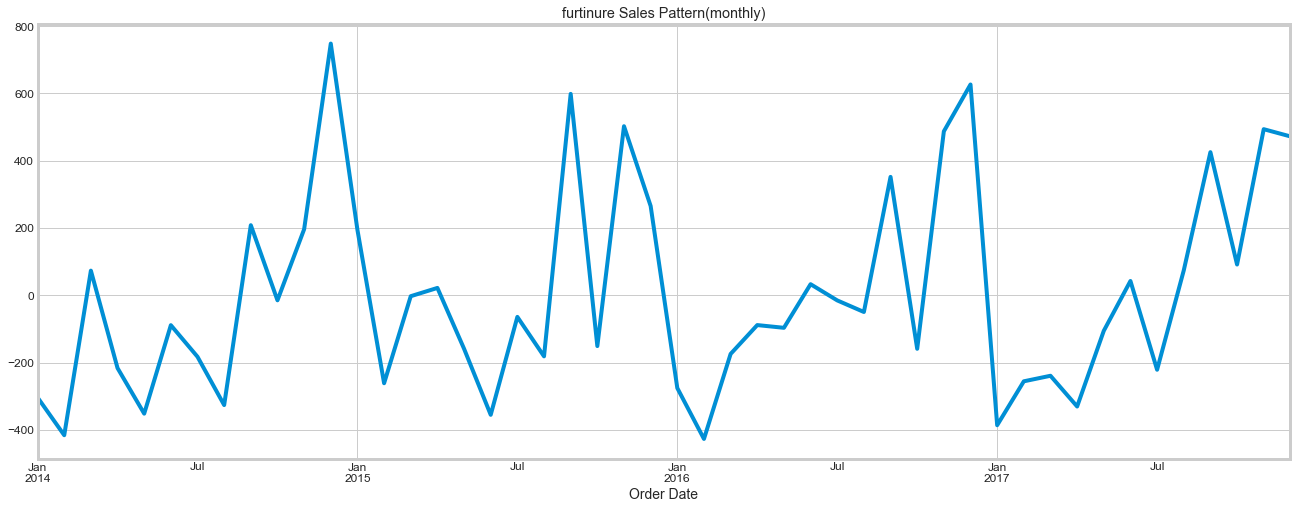

In [35]:
y1_zm_mn.plot(figsize=(20, 8))
plt.title("furtinure Sales Pattern(monthly)")
plt.show()

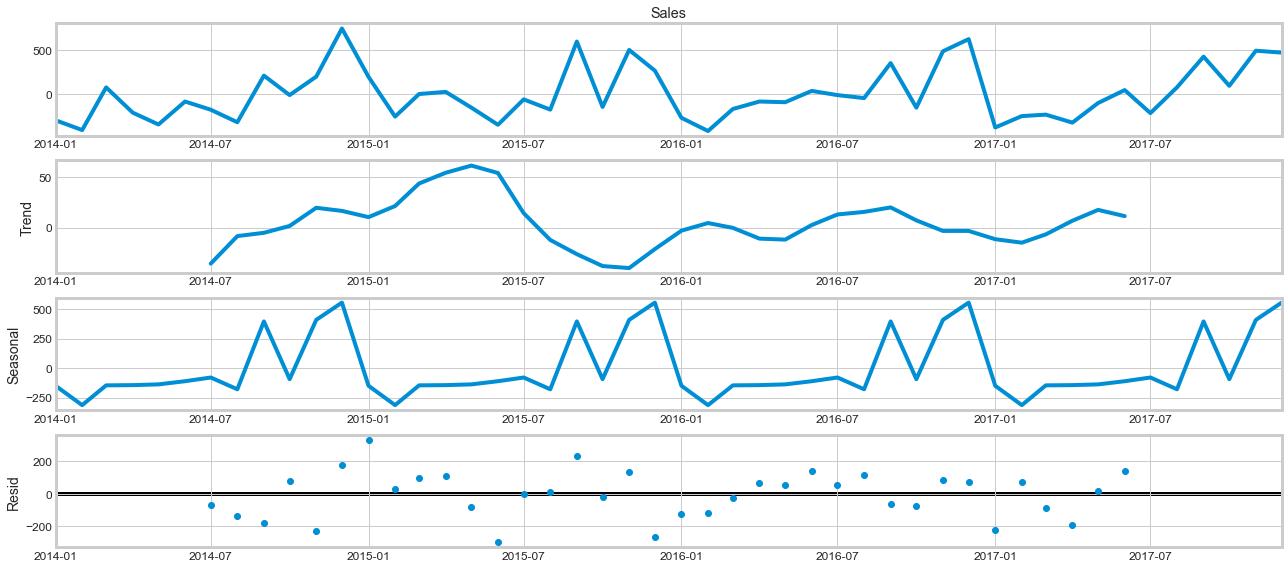

In [36]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1_zm_mn, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
##office_supplies Sales Pattern(monthly)
y2_mn = office_supplies['Sales'].resample('MS').mean()
mean_y2_mn=y2_mn.mean()
y2_zm_mn=y2_mn-mean_y2_mn
y2_zm_mn['2017':]

Order Date
2017-01-01    366.850915
2017-02-01   -210.279484
2017-03-01    -61.262739
2017-04-01    -41.932925
2017-05-01    -91.385776
2017-06-01     50.300818
2017-07-01   -206.259606
2017-08-01    555.985933
2017-09-01    538.975029
2017-10-01    285.883625
2017-11-01    523.849815
2017-12-01    449.387503
Freq: MS, Name: Sales, dtype: float64

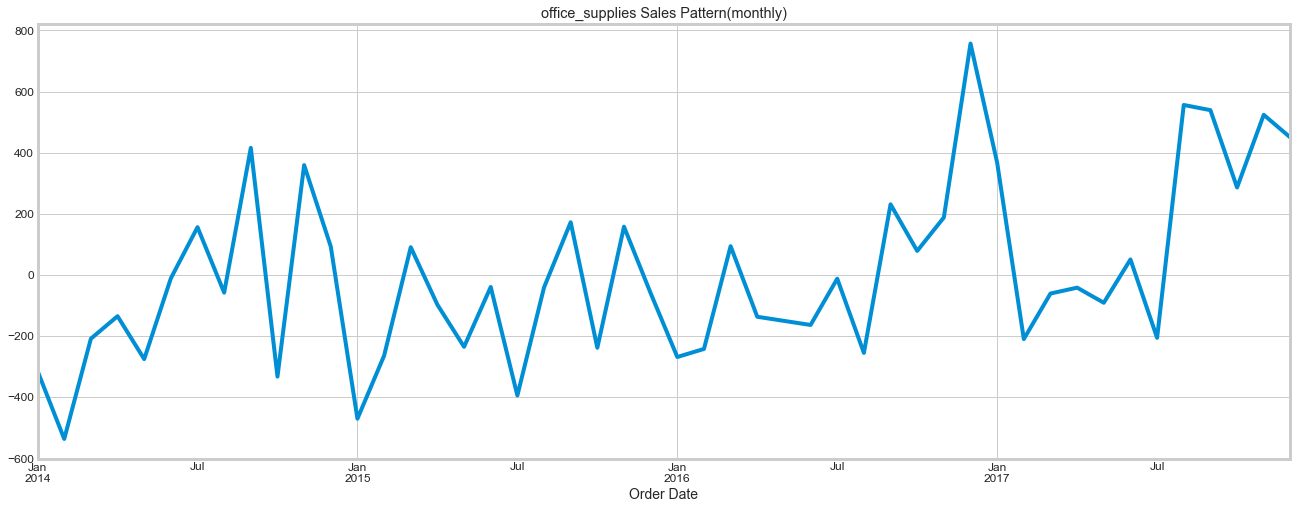

In [38]:
y2_zm_mn.plot(figsize=(20, 8))
plt.title("office_supplies Sales Pattern(monthly)")
plt.show()

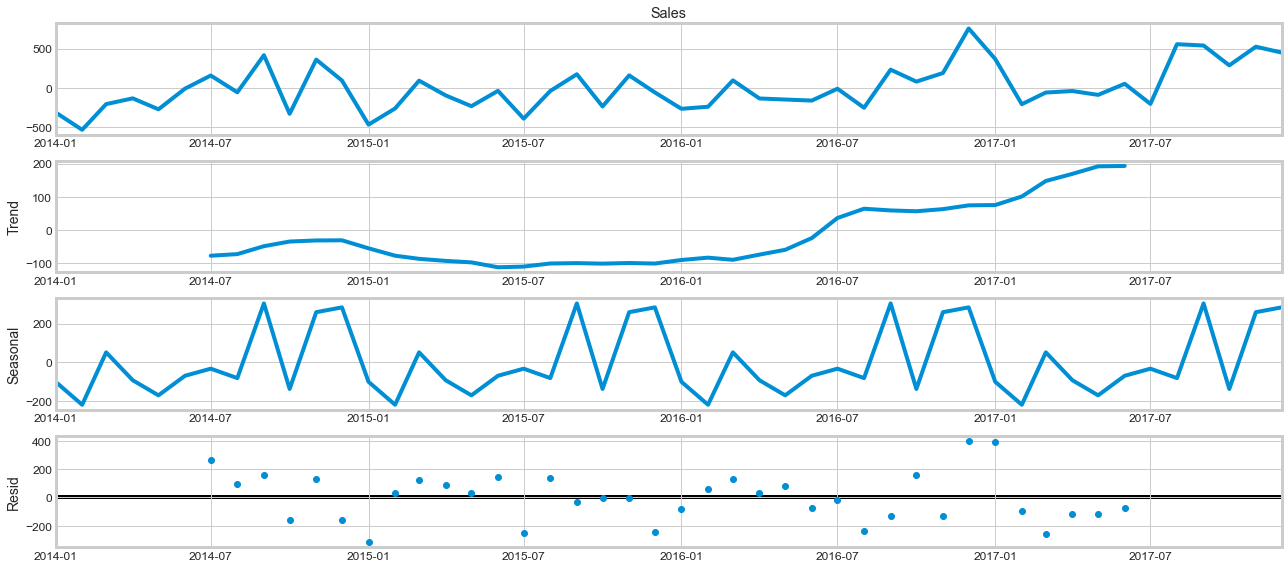

In [39]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2_zm_mn, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
##technology Sales Pattern(monthly)
y3_mn = technology['Sales'].resample('MS').mean()
mean_y3_mn=y3_mn.mean()
y3_zm_mn=y3_mn-mean_y3_mn
y3_zm_mn['2017':]

Order Date
2017-01-01     227.603186
2017-02-01    -537.113171
2017-03-01     425.244365
2017-04-01    -142.055752
2017-05-01    -289.285485
2017-06-01    -114.559885
2017-07-01      87.381751
2017-08-01      11.227448
2017-09-01     110.089235
2017-10-01     525.824342
2017-11-01    1029.136035
2017-12-01     -11.749233
Freq: MS, Name: Sales, dtype: float64

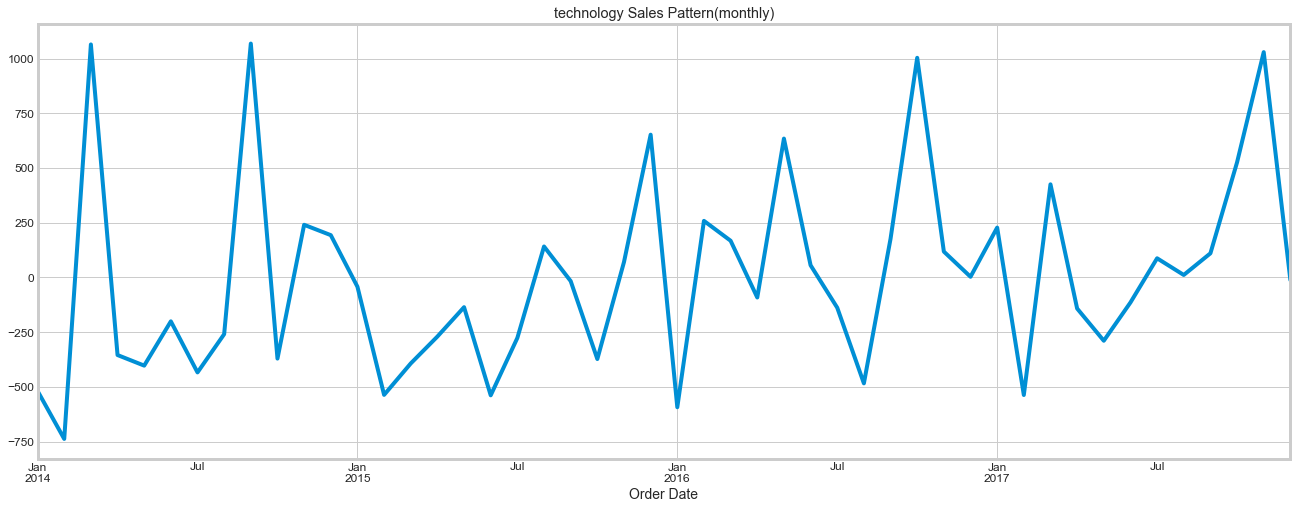

In [41]:
y3_zm_mn.plot(figsize=(20, 8))
plt.title("technology Sales Pattern(monthly)")
plt.show()

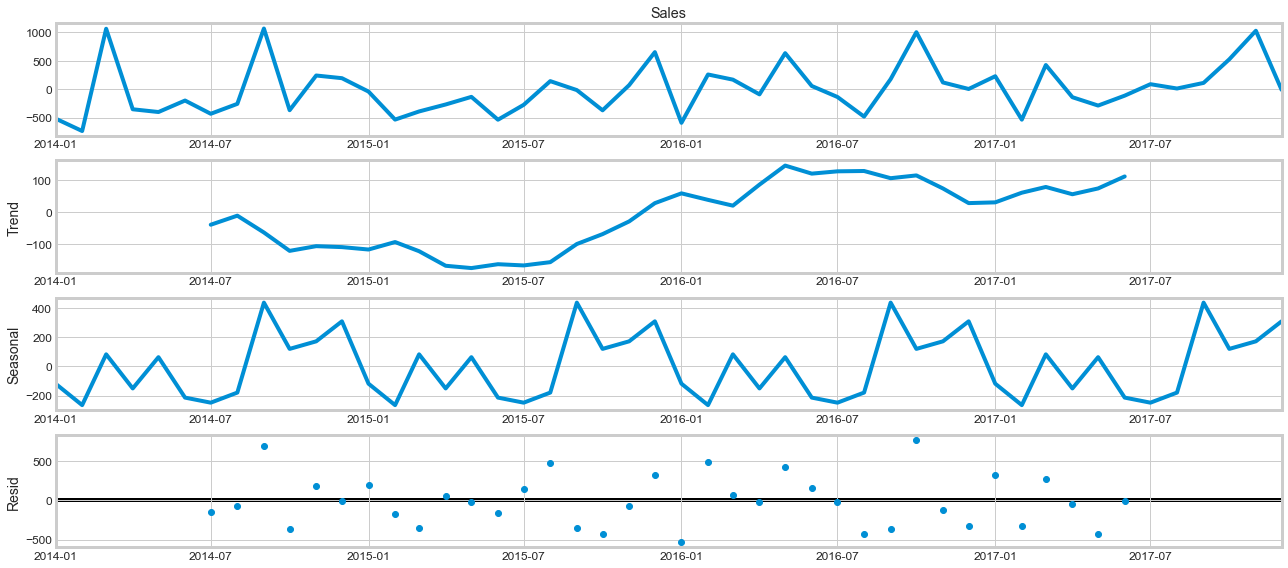

In [42]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y3_zm_mn, model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
##furtinure Sales Pattern(weekly)
y1_wk = furniture['Sales'].resample('W').mean()
mean_y1_wk=y1_wk.mean()
y1_zm_wk=y1_wk-mean_y1_wk
y1_zm_wk['2017':]

Order Date
2017-01-01      26.402464
2017-01-08     113.851864
2017-01-15    -699.493136
2017-01-22    -303.771386
2017-01-29    -707.765636
2017-02-05    -468.381470
2017-02-12    -304.216886
2017-02-19    -110.348036
2017-02-26    -159.109136
2017-03-05    -357.198470
2017-03-12    -376.876470
2017-03-19    -551.441636
2017-03-26      15.198197
2017-04-02    -148.274336
2017-04-09    -197.633636
2017-04-16    -529.342536
2017-04-23    -257.280736
2017-04-30    -376.451416
2017-05-07     291.194264
2017-05-14    -313.635636
2017-05-21      73.732064
2017-05-28    -452.532536
2017-06-04    -151.433856
2017-06-11    -268.374336
2017-06-18     146.457447
2017-06-25     -82.508536
2017-07-02     361.872414
2017-07-09    -321.379470
2017-07-16    -196.642936
2017-07-23      99.094264
2017-07-30    -398.745136
2017-08-06    -620.875803
2017-08-13    -121.681636
2017-08-20    1074.910197
2017-08-27      19.744864
2017-09-03     194.020364
2017-09-10     418.411864
2017-09-17     647.403864
2

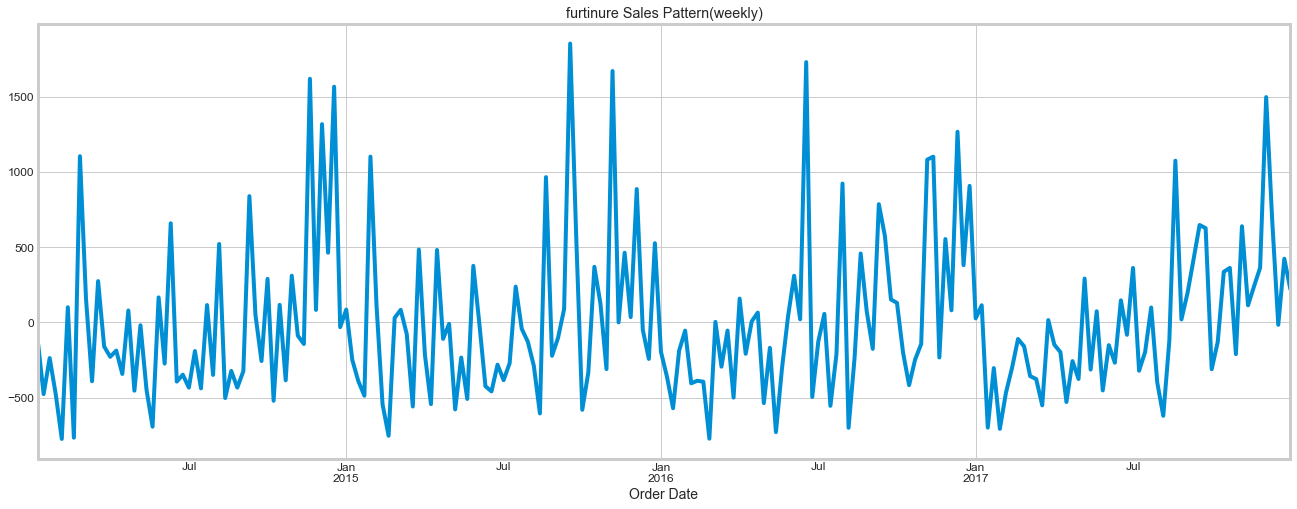

In [44]:
y1_zm_wk.plot(figsize=(20, 8))
plt.title("furtinure Sales Pattern(weekly)")
plt.show()

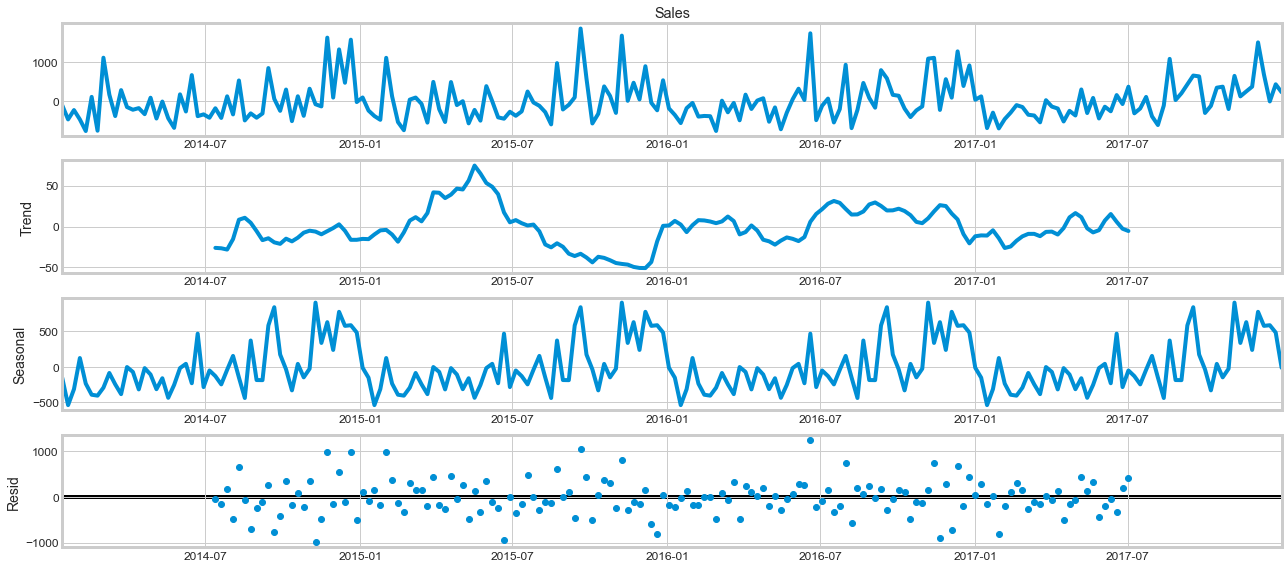

In [45]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1_zm_wk, model='additive')
fig = decomposition.plot()
plt.show()

In [46]:
##office_supplies Sales Pattern(weekly)
y2_wk = office_supplies['Sales'].resample('W').mean()
mean_y2_wk=y2_wk.mean()
y2_zm_wk=y2_wk-mean_y2_wk
y2_zm_wk['2017':]

Order Date
2017-01-01    -222.616913
2017-01-08     127.338254
2017-01-15    1009.937754
2017-01-22    1116.444354
2017-01-29    -430.723579
2017-02-05      90.313354
2017-02-12    -405.532246
2017-02-19     -95.175846
2017-02-26    -399.472446
2017-03-05    -293.200846
2017-03-12    -196.982389
2017-03-19     332.460554
2017-03-26     -26.086913
2017-04-02    -232.518532
2017-04-09     703.799754
2017-04-16    -214.355675
2017-04-23       3.633554
2017-04-30    -416.434103
2017-05-07     -93.578675
2017-05-14     116.908087
2017-05-21     -40.584246
2017-05-28    -277.085579
2017-06-04      82.527421
2017-06-11     -40.707913
2017-06-18    -286.831246
2017-06-25    -210.562079
2017-07-02     544.950087
2017-07-09    -131.599246
2017-07-16    -366.607532
2017-07-23     -42.052046
2017-07-30    -373.460446
2017-08-06    -179.174913
2017-08-13     636.526754
2017-08-20    1113.178183
2017-08-27     901.762421
2017-09-03     302.171754
2017-09-10     580.178087
2017-09-17     705.347611
2

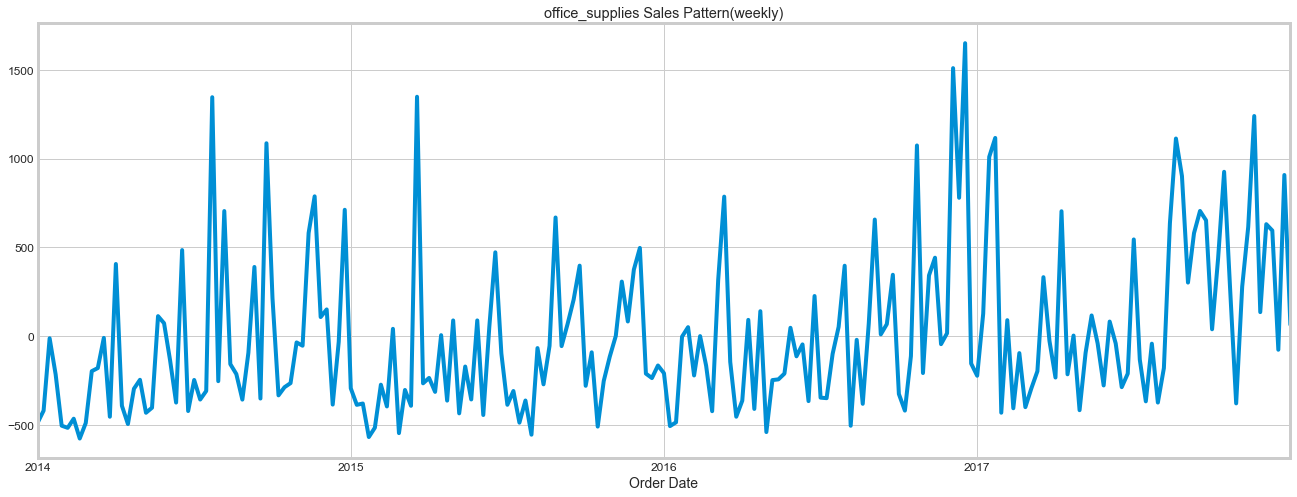

In [47]:
y2_zm_wk.plot(figsize=(20, 8))
plt.title("office_supplies Sales Pattern(weekly)")
plt.show()

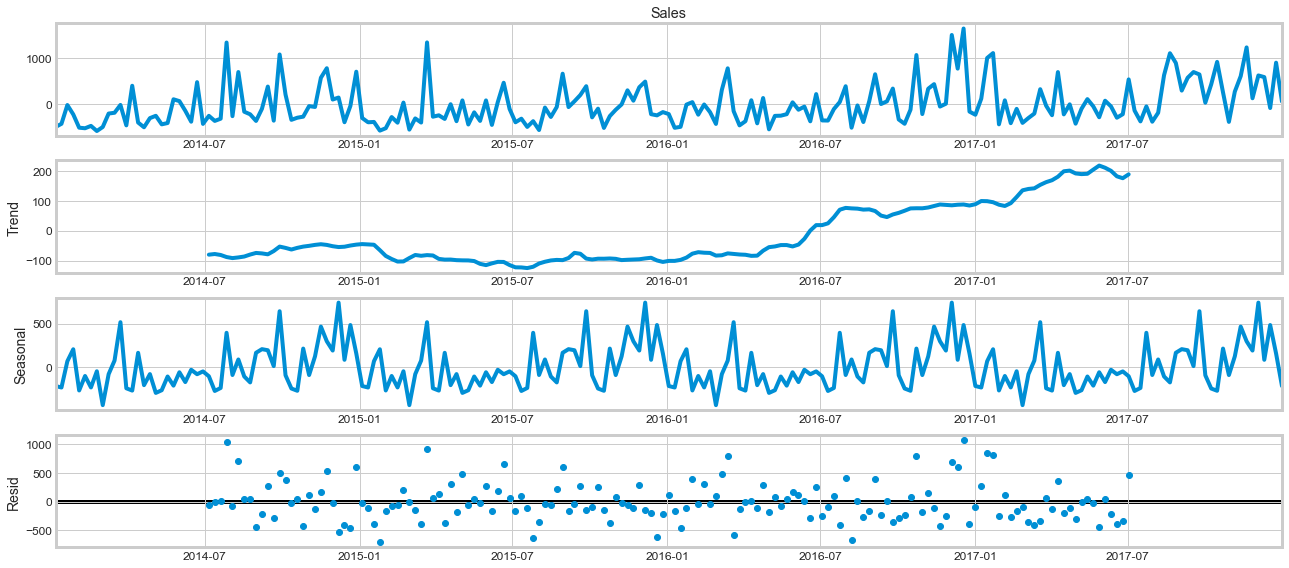

In [48]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2_zm_wk, model='additive')
fig = decomposition.plot()
plt.show()

In [49]:
##technology Sales Pattern(weekly)
y3_wk = technology['Sales'].resample('W').mean()
mean_y3_wk=y3_wk.mean()
y3_zm_wk=y3_wk-mean_y3_wk
y3_zm_wk['2017':]

Order Date
2017-01-01    -704.457384
2017-01-08     936.768616
2017-01-15    -629.735384
2017-01-22     367.178866
2017-01-29    -101.288184
2017-02-05     212.662616
2017-02-12    -801.294050
2017-02-19    -513.782884
2017-02-26    -315.504984
2017-03-05    -240.665384
2017-03-12    -608.044050
2017-03-19    -116.363384
2017-03-26    2826.340216
2017-04-02     810.961616
2017-04-09    -258.747384
2017-04-16    -799.775384
2017-04-23    -147.487134
2017-04-30    -408.894884
2017-05-07    -525.320584
2017-05-14     305.265416
2017-05-21    -129.491384
2017-05-28    -609.060584
2017-06-04    -430.846584
2017-06-11    -487.849384
2017-06-18     465.730616
2017-06-25    -526.764717
2017-07-02     168.452116
2017-07-09     550.125816
2017-07-16      69.329616
2017-07-23    -197.664384
2017-07-30     177.909616
2017-08-06    -326.114584
2017-08-13    -246.522984
2017-08-20     -44.325384
2017-08-27     863.849116
2017-09-03     203.636616
2017-09-10     -34.900717
2017-09-17     215.147216
2

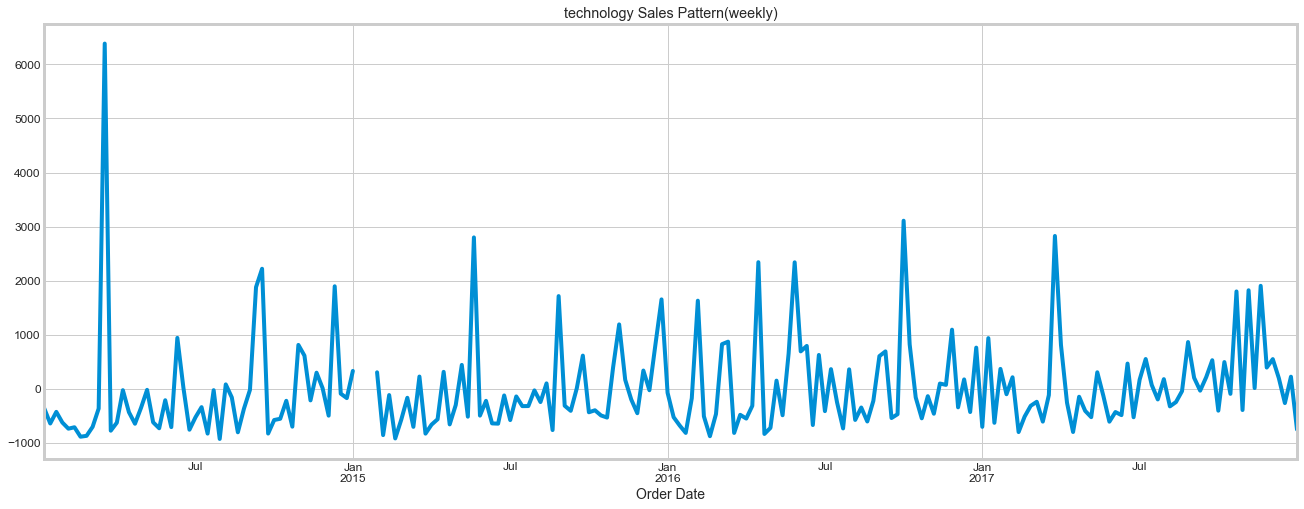

In [50]:
y3_zm_wk.plot(figsize=(20, 8))
plt.title("technology Sales Pattern(weekly)")
plt.show()

In [51]:
y3_zm_wk.isnull().sum()

2

In [52]:
y3_zm_wk['2015':]

Order Date
2015-01-04    330.018216
2015-01-11           NaN
2015-01-18   -570.301384
2015-01-25           NaN
2015-02-01    304.293616
                 ...    
2017-12-03    548.117283
2017-12-10    196.271950
2017-12-17   -265.163384
2017-12-24    222.819416
2017-12-31   -754.616984
Freq: W-SUN, Name: Sales, Length: 157, dtype: float64

In [53]:
y3_zm_wk = y3_zm_wk.dropna(axis = 0, how ='any')
y3_zm_wk['2015':]

Order Date
2015-01-04    330.018216
2015-01-18   -570.301384
2015-02-01    304.293616
2015-02-08   -857.207384
2015-02-15   -116.834050
                 ...    
2017-12-03    548.117283
2017-12-10    196.271950
2017-12-17   -265.163384
2017-12-24    222.819416
2017-12-31   -754.616984
Name: Sales, Length: 155, dtype: float64

In [54]:
y3_zm_wk.isnull().sum()

0

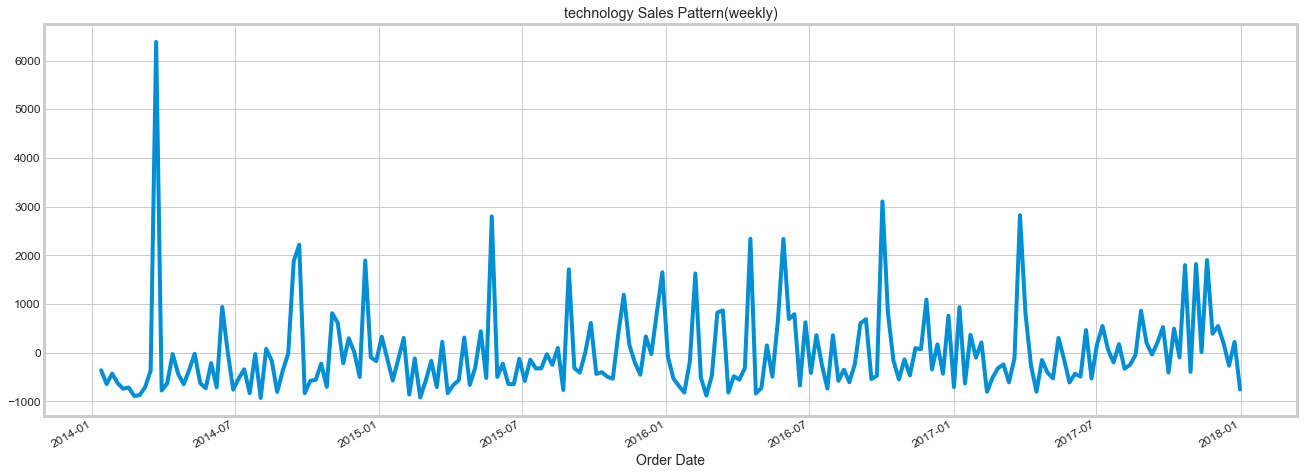

In [55]:
y3_zm_wk.plot(figsize=(20, 8))
plt.title("technology Sales Pattern(weekly)")
plt.show()

# stationarity checking

In [57]:
def stationarity(series,mlag=None,lag=None):
  print("RESULT OF ADF TEST")
  res = adfuller(series, maxlag = mlag, autolag = lag)
  output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
  for key, value in res[4].items():
     output['Critical Value ' + key] = value
  print(output)

In [58]:
####stationary checking for furtinure Sales(monthly)
stationarity(y1_zm_mn)
##p value<alpha(0.05),i.e.stationary process

RESULT OF ADF TEST
Test Statistic                 -5.191070
p value                         0.000009
used lag                       10.000000
Number of observations used    37.000000
Critical Value 1%              -3.620918
Critical Value 5%              -2.943539
Critical Value 10%             -2.610400
dtype: float64


In [59]:
####stationary checking for office_supplies Sales(monthly)
stationarity(y2_zm_mn)
##p value>alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                 -0.030983
p value                         0.955894
used lag                       10.000000
Number of observations used    37.000000
Critical Value 1%              -3.620918
Critical Value 5%              -2.943539
Critical Value 10%             -2.610400
dtype: float64


In [60]:
##first order differencing,d=1 for y2_zm_mn
y2diff_zm_mn=y2_zm_mn.copy()
y2diff_zm_mn=y2diff_zm_mn.diff()
y2diff_zm_mn.head()

Order Date
2014-01-01           NaN
2014-02-01   -222.315059
2014-03-01    328.133730
2014-04-01     73.618432
2014-05-01   -140.448205
Freq: MS, Name: Sales, dtype: float64

In [61]:
y2diff_zm_mn=y2diff_zm_mn.dropna(axis=0)
y2diff_zm_mn.head()

Order Date
2014-02-01   -222.315059
2014-03-01    328.133730
2014-04-01     73.618432
2014-05-01   -140.448205
2014-06-01    264.427864
Freq: MS, Name: Sales, dtype: float64

In [62]:
stationarity(y2diff_zm_mn)
##p value<alpha(0.05),i.e.stationary process

RESULT OF ADF TEST
Test Statistic                 -3.380982
p value                         0.011625
used lag                       10.000000
Number of observations used    36.000000
Critical Value 1%              -3.626652
Critical Value 5%              -2.945951
Critical Value 10%             -2.611671
dtype: float64


In [63]:
####stationary checking for technology Sales(monthly)
stationarity(y3_zm_mn)
##p value>alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                 -1.251270
p value                         0.651161
used lag                       10.000000
Number of observations used    37.000000
Critical Value 1%              -3.620918
Critical Value 5%              -2.943539
Critical Value 10%             -2.610400
dtype: float64


In [64]:
##first order differencing,d=1 for y3_zm_mn
y3diff1_zm_mn=y3_zm_mn.copy()
y3diff1_zm_mn=y3diff1_zm_mn.diff()
y3diff1_zm_mn.head()

Order Date
2014-01-01            NaN
2014-02-01    -219.254286
2014-03-01    1802.161232
2014-04-01   -1418.919442
2014-05-01     -48.330345
Freq: MS, Name: Sales, dtype: float64

In [65]:
y3diff1_zm_mn=y3diff1_zm_mn.dropna(axis=0)
y3diff1_zm_mn.head()

Order Date
2014-02-01    -219.254286
2014-03-01    1802.161232
2014-04-01   -1418.919442
2014-05-01     -48.330345
2014-06-01     202.207321
Freq: MS, Name: Sales, dtype: float64

In [66]:
stationarity(y3diff1_zm_mn)
##p value>alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                 -2.840882
p value                         0.052667
used lag                       10.000000
Number of observations used    36.000000
Critical Value 1%              -3.626652
Critical Value 5%              -2.945951
Critical Value 10%             -2.611671
dtype: float64


In [67]:
##Second order differencing,d=2 for y3_zm_mn
y3diff2_zm_mn=y3diff1_zm_mn.copy()
y3diff2_zm_mn=y3diff2_zm_mn.diff()
y3diff2_zm_mn.head()

Order Date
2014-02-01            NaN
2014-03-01    2021.415518
2014-04-01   -3221.080674
2014-05-01    1370.589097
2014-06-01     250.537666
Freq: MS, Name: Sales, dtype: float64

In [68]:
y3diff2_zm_mn=y3diff2_zm_mn.dropna(axis=0)
y3diff2_zm_mn.head()

Order Date
2014-03-01    2021.415518
2014-04-01   -3221.080674
2014-05-01    1370.589097
2014-06-01     250.537666
2014-07-01    -435.504297
Freq: MS, Name: Sales, dtype: float64

In [69]:
stationarity(y3diff2_zm_mn)
##p value>alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                 -2.697887
p value                         0.074405
used lag                       10.000000
Number of observations used    35.000000
Critical Value 1%              -3.632743
Critical Value 5%              -2.948510
Critical Value 10%             -2.613017
dtype: float64


In [70]:
##Third order differencing,d=3 for y3_zm_mn
y3diff3_zm_mn=y3diff2_zm_mn.copy()
y3diff3_zm_mn=y3diff3_zm_mn.diff()
y3diff3_zm_mn.head()

Order Date
2014-03-01            NaN
2014-04-01   -5242.496192
2014-05-01    4591.669770
2014-06-01   -1120.051431
2014-07-01    -686.041963
Freq: MS, Name: Sales, dtype: float64

In [71]:
y3diff3_zm_mn=y3diff3_zm_mn.dropna(axis=0)
y3diff3_zm_mn.head()

Order Date
2014-04-01   -5242.496192
2014-05-01    4591.669770
2014-06-01   -1120.051431
2014-07-01    -686.041963
2014-08-01     843.627724
Freq: MS, Name: Sales, dtype: float64

In [72]:
stationarity(y3diff3_zm_mn)
##p value<alpha(0.05),i.e.stationary process

RESULT OF ADF TEST
Test Statistic                 -3.600729
p value                         0.005747
used lag                       10.000000
Number of observations used    34.000000
Critical Value 1%              -3.639224
Critical Value 5%              -2.951230
Critical Value 10%             -2.614447
dtype: float64


In [73]:
####stationary checking for furtinure Sales(weekly)
stationarity(y1_zm_wk)
##p value<alpha(0.05),i.e.stationary process

RESULT OF ADF TEST
Test Statistic                  -3.058128
p value                          0.029811
used lag                        15.000000
Number of observations used    192.000000
Critical Value 1%               -3.464875
Critical Value 5%               -2.876714
Critical Value 10%              -2.574859
dtype: float64


In [74]:
####stationary checking for office_supplies Sales(weekly)
stationarity(y2_zm_wk)
##p value>alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                  -2.014300
p value                          0.280339
used lag                        15.000000
Number of observations used    193.000000
Critical Value 1%               -3.464694
Critical Value 5%               -2.876635
Critical Value 10%              -2.574816
dtype: float64


In [75]:
##first order differencing,d=1 for y2_zm_wk
y2diff_zm_wk=y2_zm_wk.copy()
y2diff_zm_wk=y2diff_zm_wk.diff()
y2diff_zm_wk.head()

Order Date
2014-01-05           NaN
2014-01-12     68.986333
2014-01-19    407.440000
2014-01-26   -203.384333
2014-02-02   -288.860667
Freq: W-SUN, Name: Sales, dtype: float64

In [76]:
y2diff_zm_wk=y2diff_zm_wk.dropna(axis=0)
y2diff_zm_wk.head()

Order Date
2014-01-12     68.986333
2014-01-19    407.440000
2014-01-26   -203.384333
2014-02-02   -288.860667
2014-02-09    -12.094000
Freq: W-SUN, Name: Sales, dtype: float64

In [77]:
stationarity(y2diff_zm_wk)
##p value<alpha(0.05),i.e.stationary process

RESULT OF ADF TEST
Test Statistic                  -4.702910
p value                          0.000083
used lag                        15.000000
Number of observations used    192.000000
Critical Value 1%               -3.464875
Critical Value 5%               -2.876714
Critical Value 10%              -2.574859
dtype: float64


In [78]:
####stationary checking for technology Sales(weekly)
stationarity(y3_zm_wk)
##p value<alpha(0.05),i.e.non-stationary process

RESULT OF ADF TEST
Test Statistic                  -2.960809
p value                          0.038720
used lag                        15.000000
Number of observations used    190.000000
Critical Value 1%               -3.465244
Critical Value 5%               -2.876875
Critical Value 10%              -2.574945
dtype: float64


# acf pacf plots

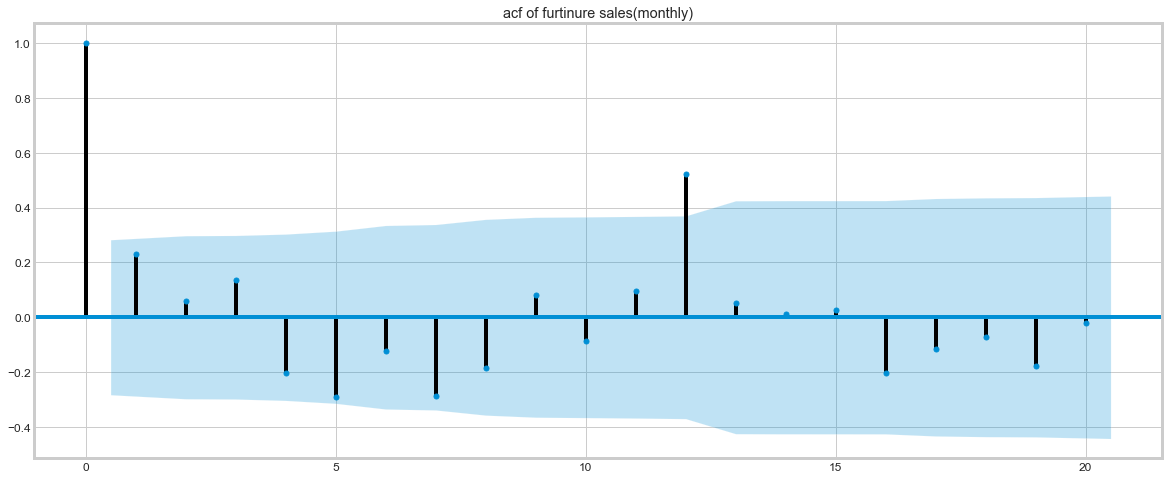

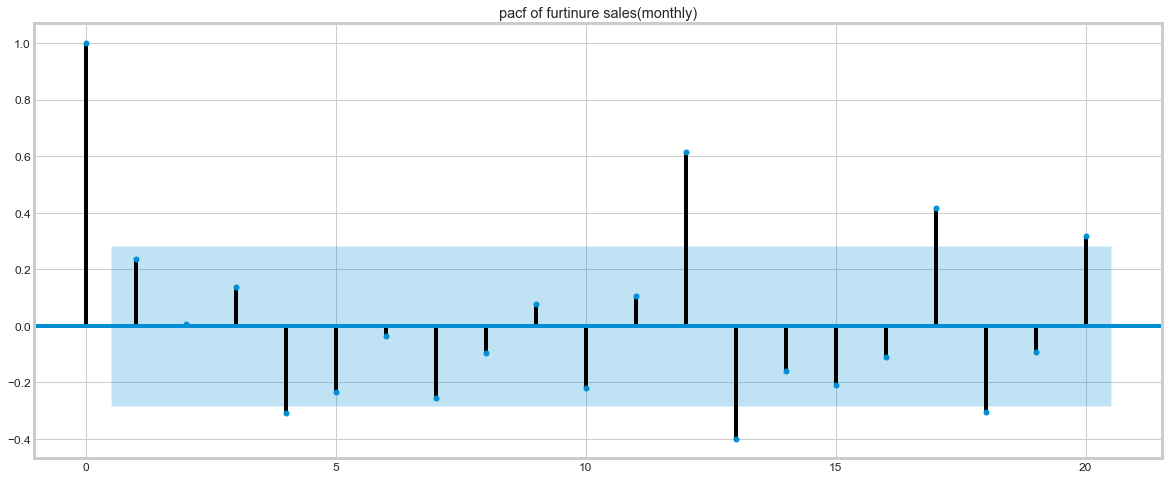

In [80]:
##plot for furtinure Sales(monthly)
plot_acf(y1_zm_mn, lags=20)
plt.title("acf of furtinure sales(monthly)")
pyplot.show()

plot_pacf(y1_zm_mn, lags=20)
plt.title("pacf of furtinure sales(monthly)")
pyplot.show()

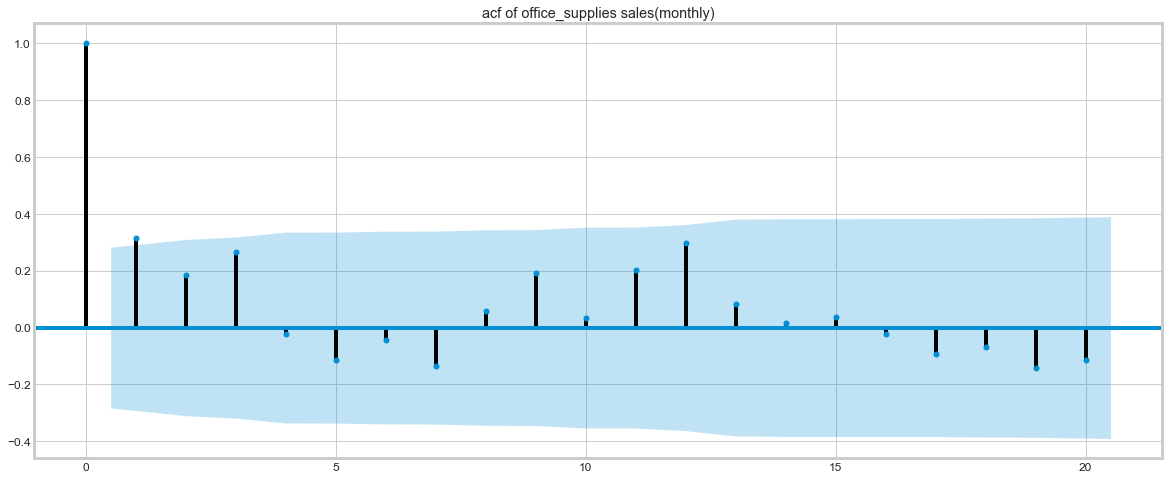

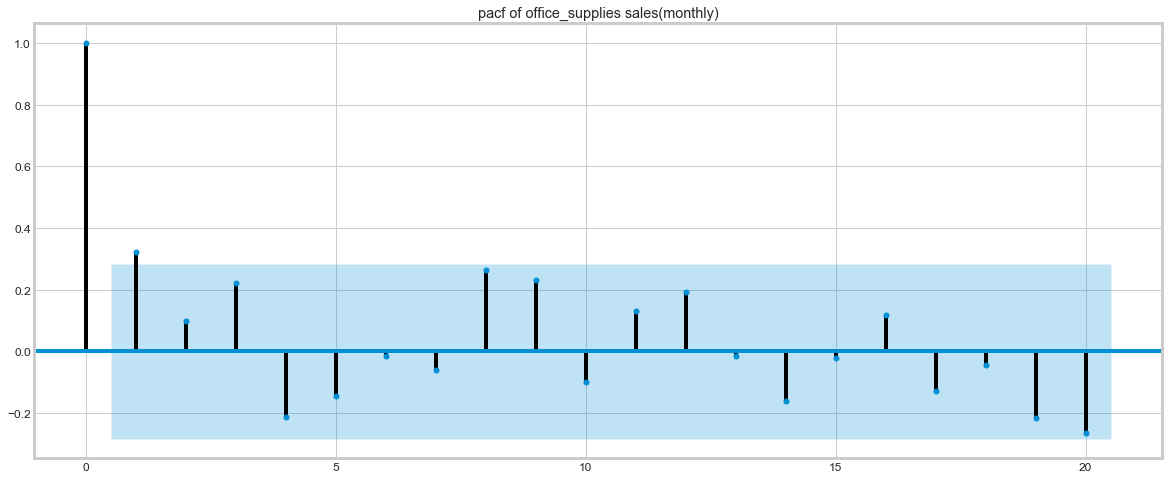

In [81]:
##plot for office_supplies Sales(monthly)
plot_acf(y2_zm_mn, lags=20)
plt.title("acf of office_supplies sales(monthly)")
pyplot.show()

plot_pacf(y2_zm_mn, lags=20)
plt.title("pacf of office_supplies sales(monthly)")
pyplot.show()

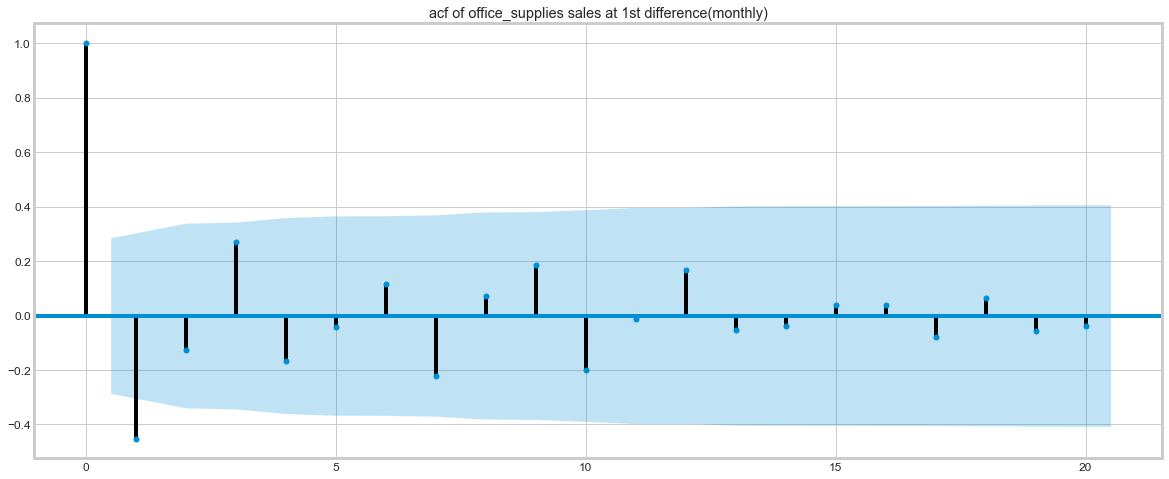

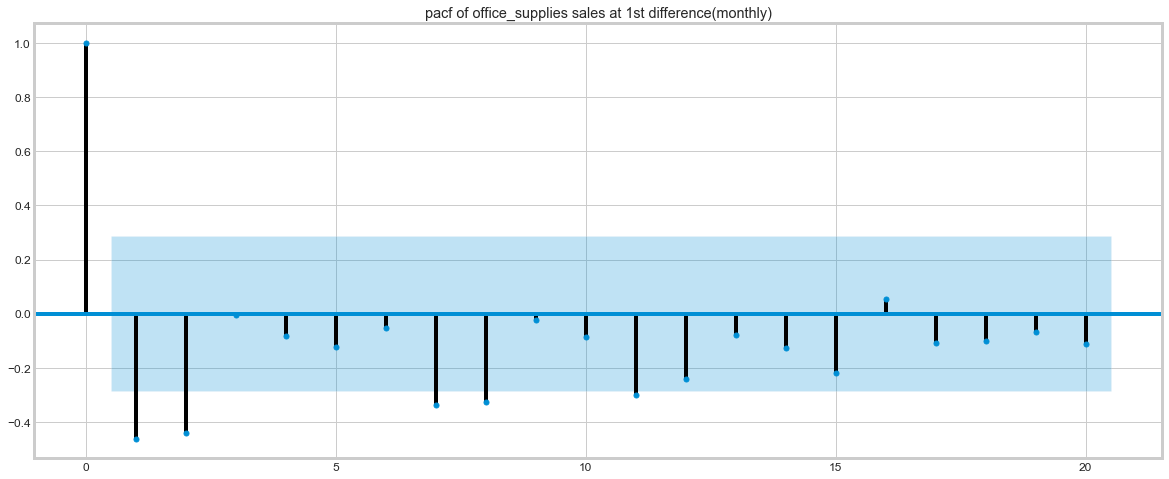

In [82]:
##plot for office_supplies Sales at 1st difference(monthly)
plot_acf(y2diff_zm_mn, lags=20)
plt.title("acf of office_supplies sales at 1st difference(monthly)")
pyplot.show()

plot_pacf(y2diff_zm_mn, lags=20)
plt.title("pacf of office_supplies sales at 1st difference(monthly)")
pyplot.show()

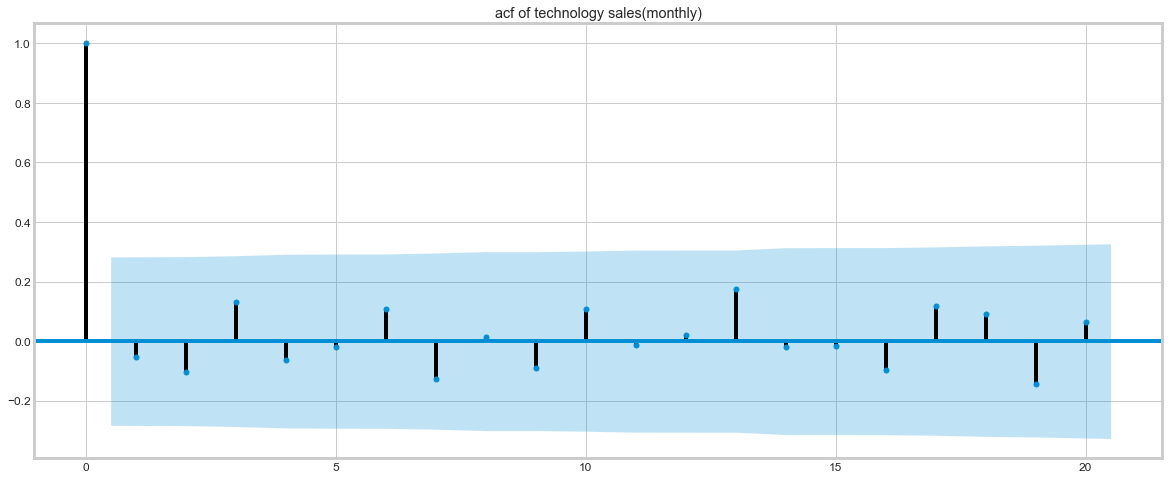

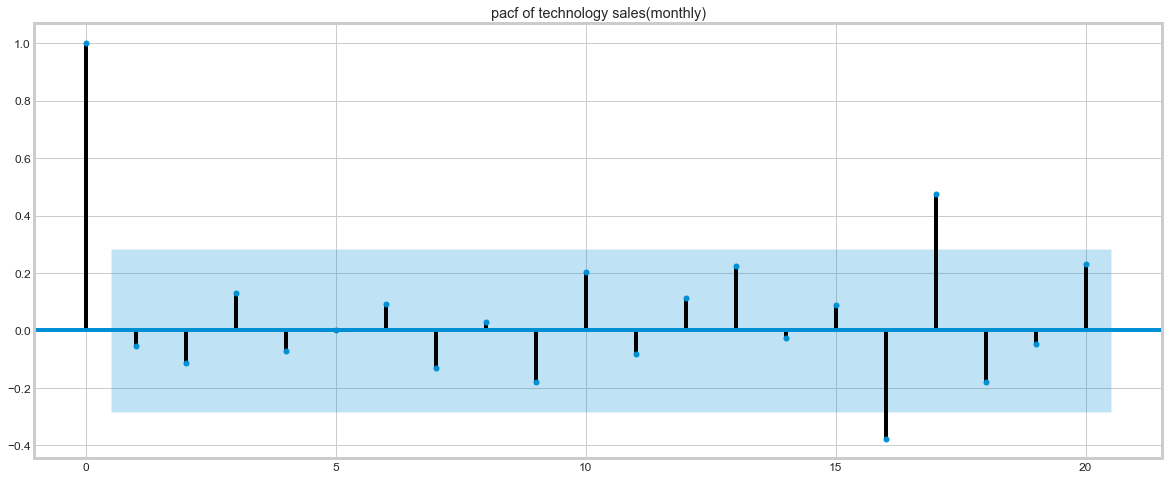

In [83]:
##plot for technology Sales(monthly)
plot_acf(y3_zm_mn, lags=20)
plt.title("acf of technology sales(monthly)")
pyplot.show()

plot_pacf(y3_zm_mn, lags=20)
plt.title("pacf of technology sales(monthly)")
pyplot.show()

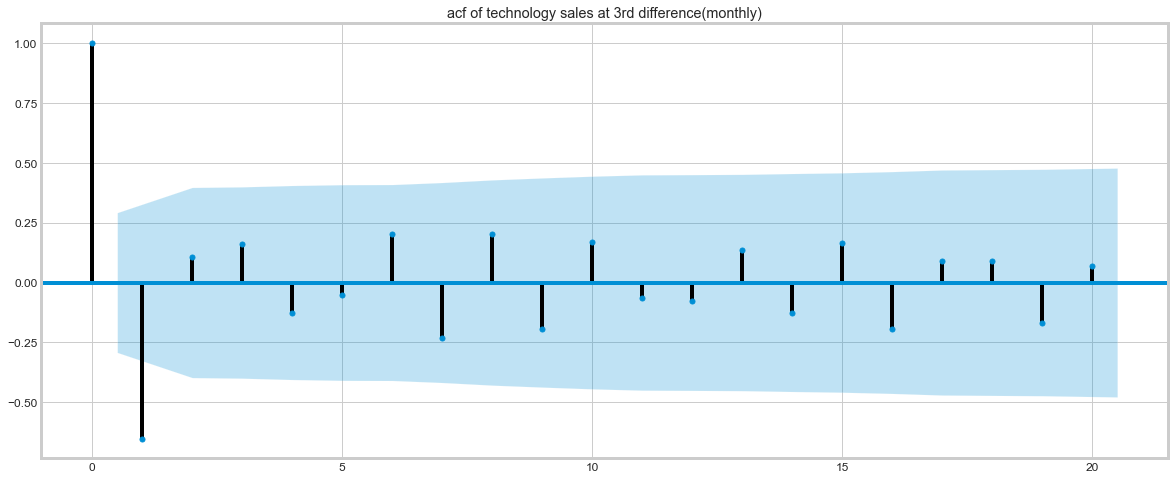

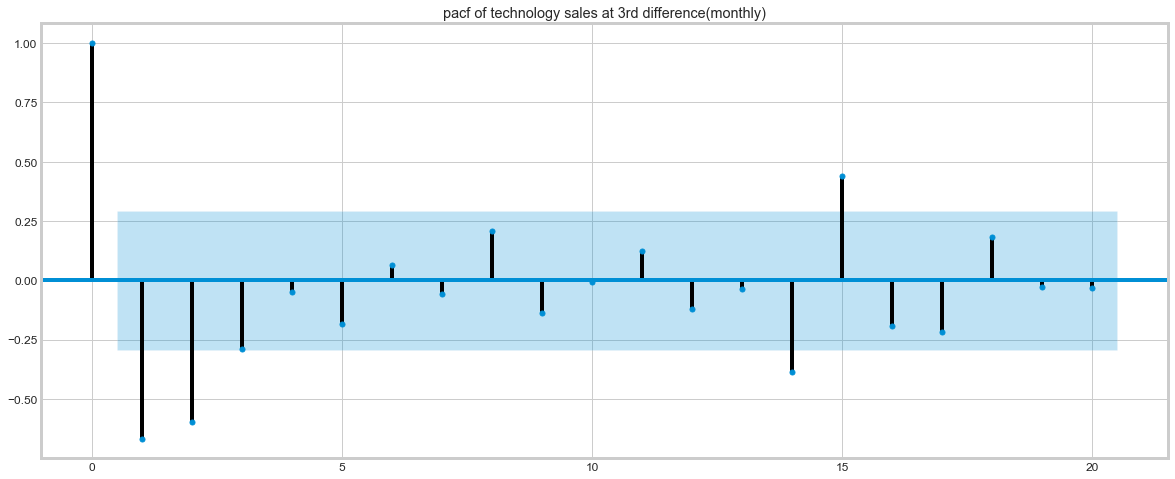

In [84]:
##plot for technology Sales at 3rd difference(monthly)
plot_acf(y3diff3_zm_mn, lags=20)
plt.title("acf of technology sales at 3rd difference(monthly)")
pyplot.show()

plot_pacf(y3diff3_zm_mn, lags=20)
plt.title("pacf of technology sales at 3rd difference(monthly)")
pyplot.show()

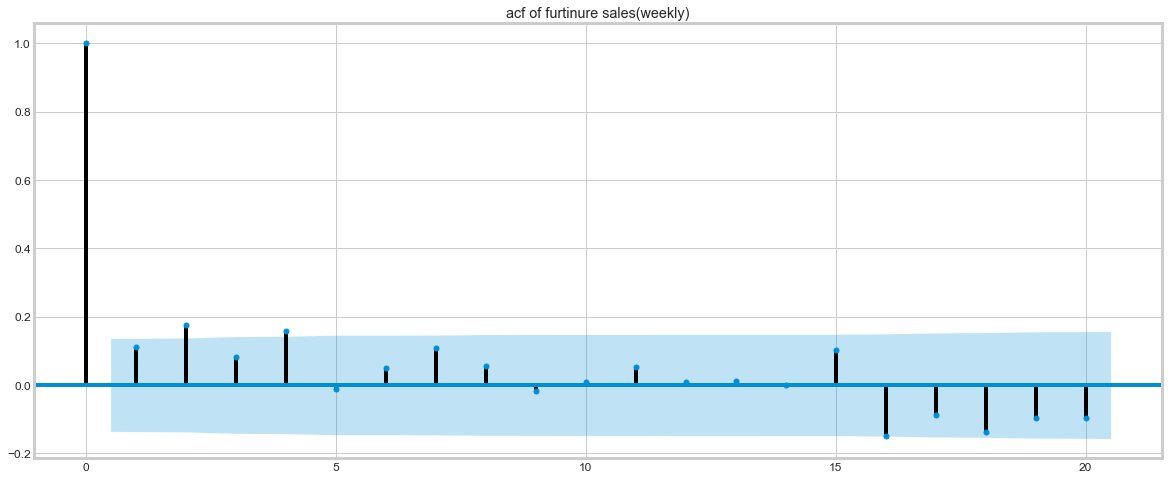

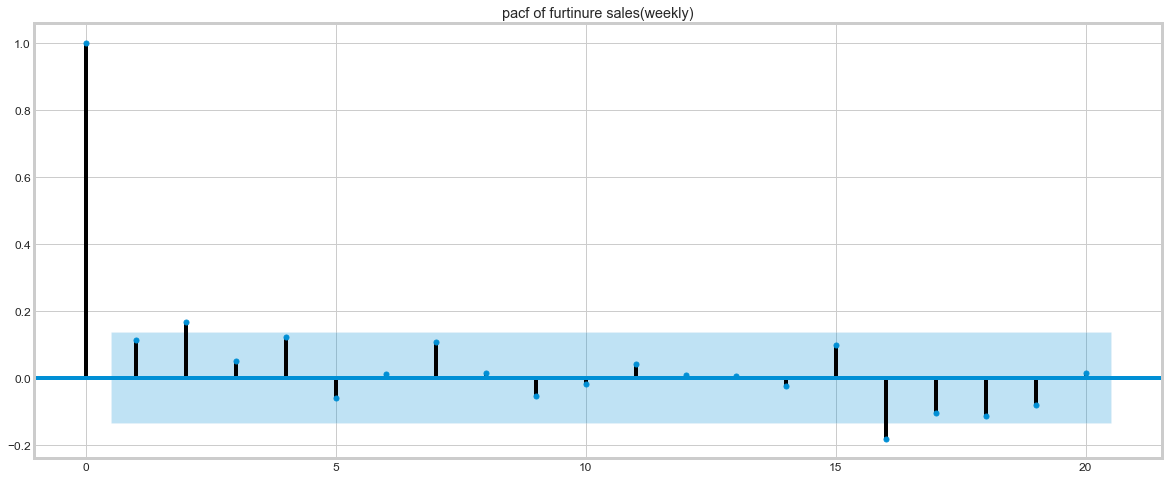

In [85]:
##plot for furtinure Sales(weekly)
plot_acf(y1_zm_wk, lags=20)
plt.title("acf of furtinure sales(weekly)")
pyplot.show()

plot_pacf(y1_zm_wk, lags=20)
plt.title("pacf of furtinure sales(weekly)")
pyplot.show()

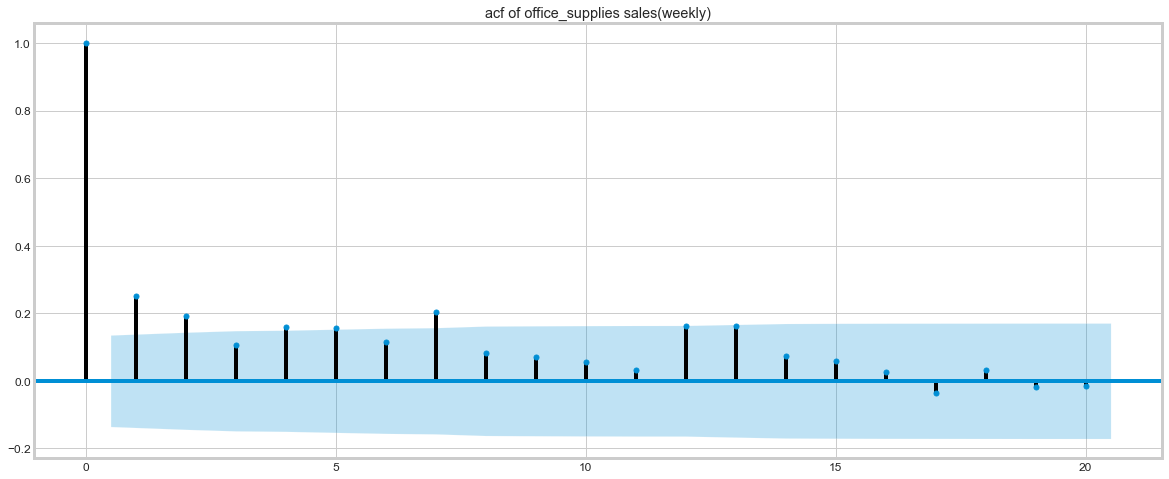

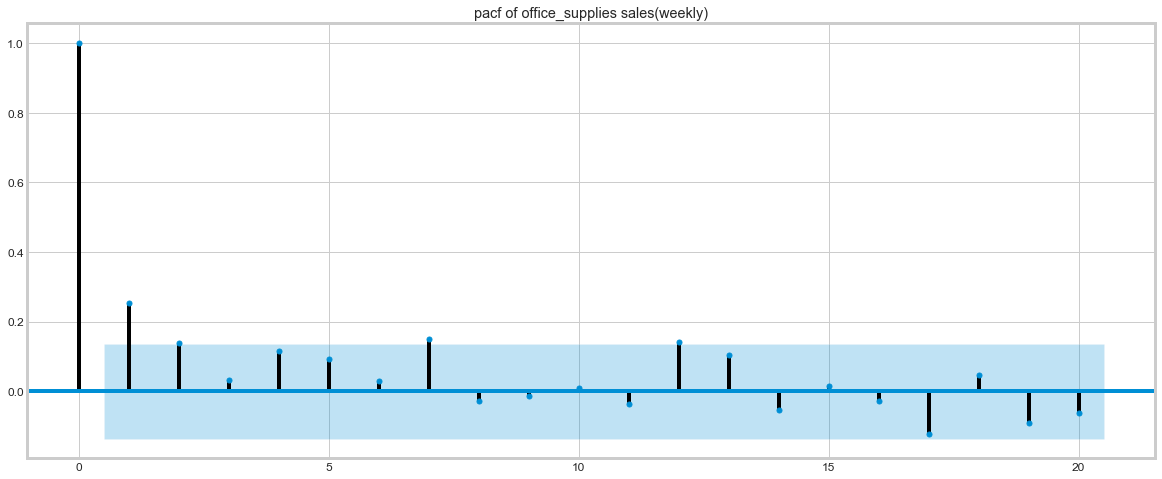

In [86]:
##plot for office_supplies Sales(weekly)
plot_acf(y2_zm_wk, lags=20)
plt.title("acf of office_supplies sales(weekly)")
pyplot.show()

plot_pacf(y2_zm_wk, lags=20)
plt.title("pacf of office_supplies sales(weekly)")
pyplot.show()

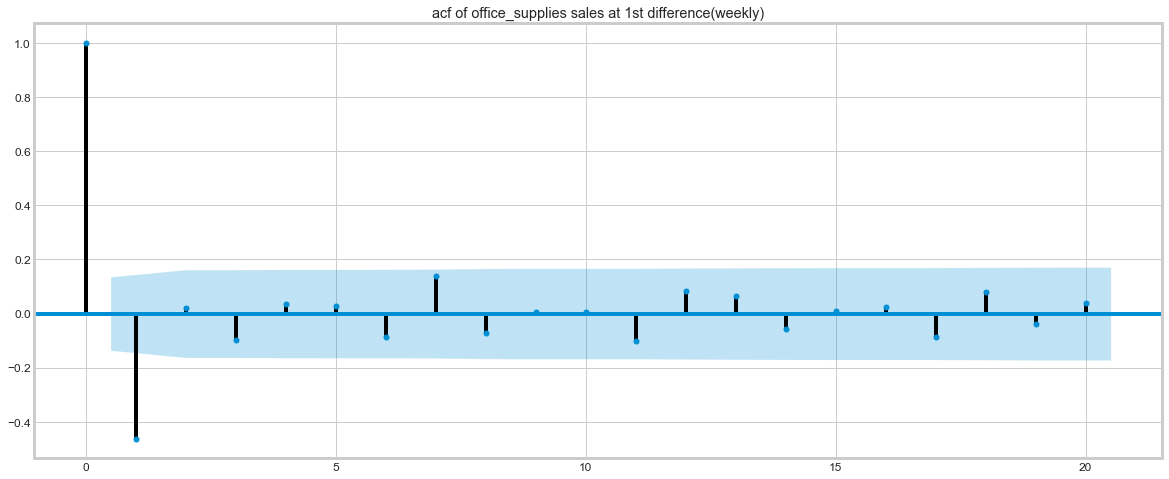

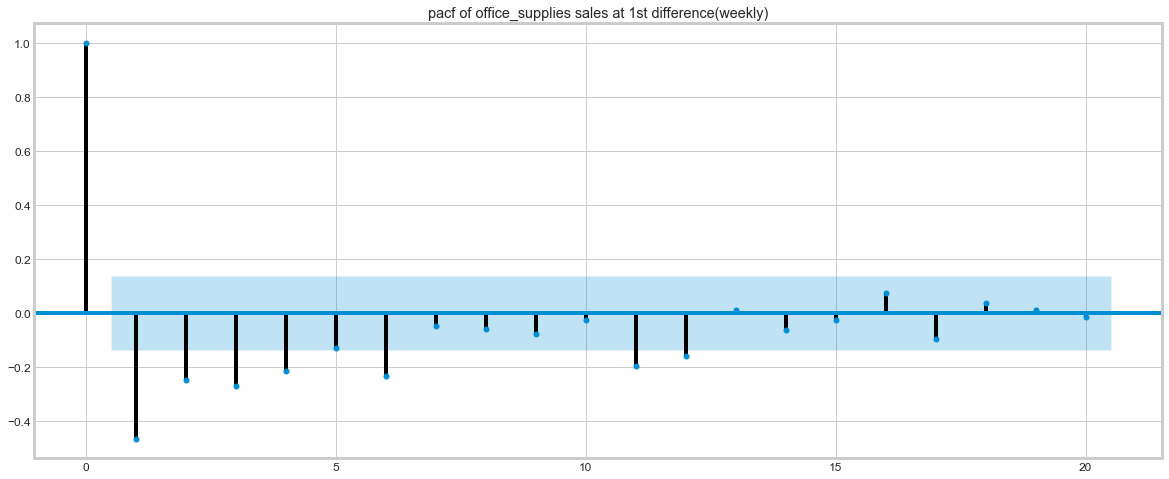

In [87]:
##plot for office_supplies Sales at 1st difference(weekly)
plot_acf(y2diff_zm_wk, lags=20)
plt.title("acf of office_supplies sales at 1st difference(weekly)")
pyplot.show()

plot_pacf(y2diff_zm_wk, lags=20)
plt.title("pacf of office_supplies sales at 1st difference(weekly)")
pyplot.show()

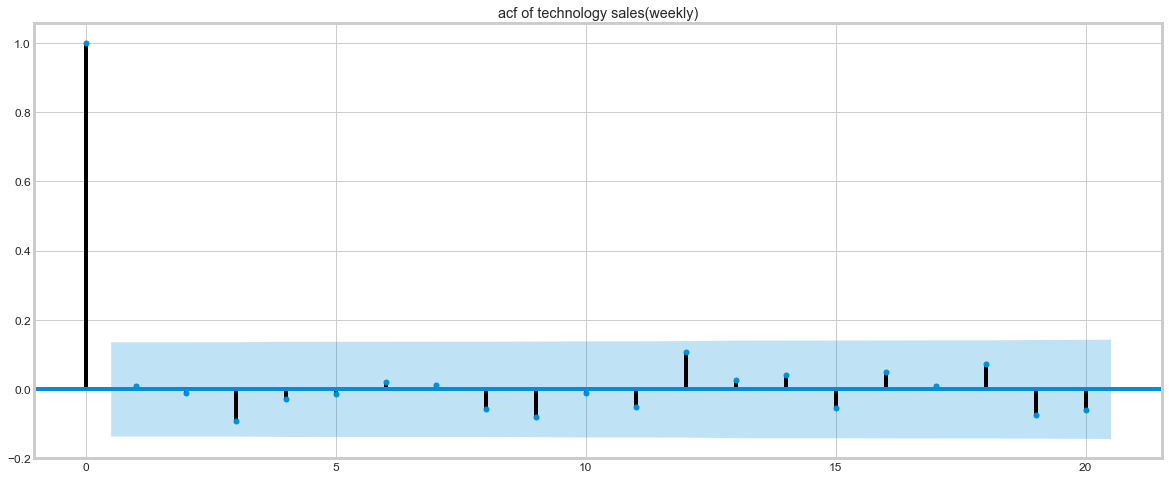

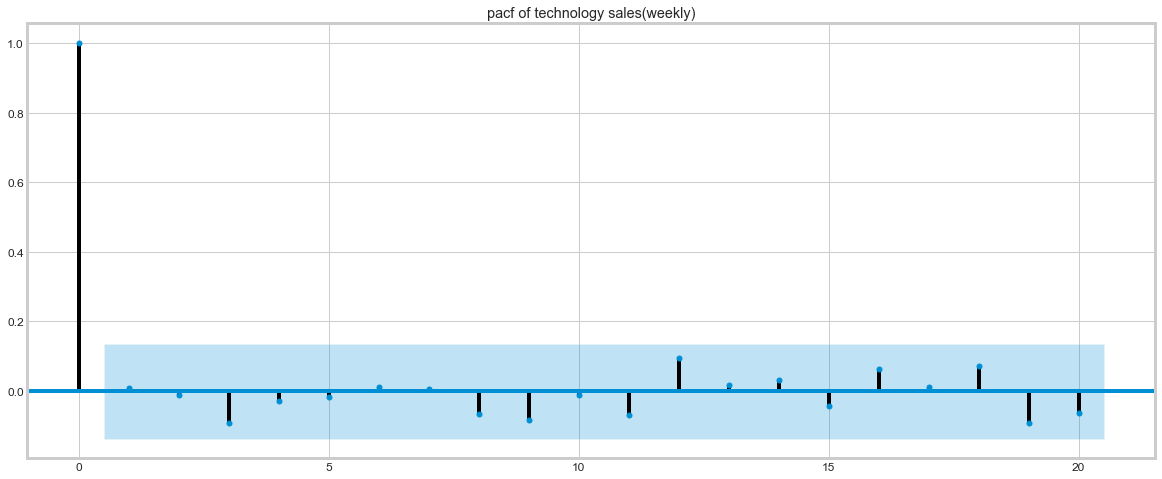

In [88]:
##plot for technology Sales(weekly)
plot_acf(y3_zm_wk, lags=20)
plt.title("acf of technology sales(weekly)")
pyplot.show()

plot_pacf(y3_zm_wk, lags=20)
plt.title("pacf of technology sales(weekly)")
pyplot.show()

# forecasting

In [89]:
##for furniture sales(monthly)
p,d,q = (1,0,1)
arima_mod = ARIMA(y1_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARMA
Model:              ARMA             BIC:                 697.5879  
Dependent Variable: Sales            Log-Likelihood:      -341.05   
Date:               2020-12-30 10:51 Scale:               1.0000    
No. Observations:   48               Method:              css-mle   
Df Model:           3                Sample:              01-01-2014
Df Residuals:       45                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 294.599   
No. Iterations:     25.0000          HQIC:                692.932   
AIC:                690.1031                                        
---------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|     [0.025    0.975] 
---------------------------------------------------------------------
const          1.5046   58.7870   0.0256  0.9796  -113.7158  116.7250
ar.L1.Sales    0.4039    0.4858   0.8315  0.4057    -0.548

In [90]:
p,d,q = (1,1,1)
arima_mod = ARIMA(y1_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 685.6690  
Dependent Variable: D.Sales          Log-Likelihood:      -335.13   
Date:               2020-12-30 10:51 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           3                Sample:              02-01-2014
Df Residuals:       44                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 291.613   
No. Iterations:     31.0000          HQIC:                681.053   
AIC:                678.2684                                        
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            5.6126    3.9155    1.4334  0.1517  -2.0617  13.2869
ar.L1.D.Sales    0.2360    0.1465    1.6110  0.1072  -0.0

In [91]:
p,d,q = (2,1,2)
arima_mod = ARIMA(y1_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 697.4004  
Dependent Variable: D.Sales          Log-Likelihood:      -337.15   
Date:               2020-12-30 10:51 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           5                Sample:              02-01-2014
Df Residuals:       42                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 313.994   
No. Iterations:     30.0000          HQIC:                690.477   
AIC:                686.2995                                        
---------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
---------------------------------------------------------------------
const           15.0205   27.0679   0.5549  0.5790  -38.0317  68.0727
ar.L1.D.Sales   -0.7127    0.3287  -2.1680  0.0302   -1.3

In [92]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [93]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y1_zm_mn,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results1 = mod1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:672.6740721972386
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1380.5803093041036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309192935
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2337618579529
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:491.02036312334064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1428.1943845933954
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2228609114525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:657.1014067929924
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2552.099704154995
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607360343603
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.5872050821384
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:492.7707365851943
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2581.124176118593
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9611072815659
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:292.6986460148747
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:755.9267712508868
ARIMA(0

In [98]:
##for furniture sales(weekly)
p,d,q = (1,1,1)
arima_mod = ARIMA(y1_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 3195.0986 
Dependent Variable: D.Sales          Log-Likelihood:      -1586.9   
Date:               2020-12-30 10:55 Scale:               1.0000    
No. Observations:   207              Method:              css-mle   
Df Model:           3                Sample:              01-19-2014
Df Residuals:       204                                   12-31-2017
Converged:          1.0000           S.D. of innovations: 514.781   
No. Iterations:     18.0000          HQIC:                3187.159  
AIC:                3181.7677                                       
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            2.9172    4.8766    0.5982  0.5497  -6.6409  12.4752
ar.L1.D.Sales   -0.0188    0.0907   -0.2073  0.8358  -0.1

In [99]:
p,d,q = (2,1,2)
arima_mod = ARIMA(y1_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 3198.6143 
Dependent Variable: D.Sales          Log-Likelihood:      -1583.3   
Date:               2020-12-30 10:55 Scale:               1.0000    
No. Observations:   207              Method:              css-mle   
Df Model:           5                Sample:              01-19-2014
Df Residuals:       202                                   12-31-2017
Converged:          1.0000           S.D. of innovations: 502.323   
No. Iterations:     18.0000          HQIC:                3186.704  
AIC:                3178.6180                                       
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             1.1973    0.9661   1.2393  0.2152  -0.6963   3.0908
ar.L1.D.Sales     0.6838    0.2665   2.5659  0.0103   0.1

In [100]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod11 = sm.tsa.statespace.SARIMAX(y1_zm_wk,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results11 = mod11.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results11.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3176.0277360627797
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2993.81540278452
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3124.2476432640997
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2838.1259001057897
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3008.326583778129
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2995.57781682916
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2922.027171398454
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2840.0875957282287
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3160.96831866692
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2979.0755436576137
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3110.295144125636
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2822.982746415705
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3008.020097636062
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2980.7839416152656
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2923.2739640872564
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2824.8994783104517
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3279.6635855461327
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3087.547248390516
ARIM

In [94]:
##AIC value of furniture(monthly) is least of ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.55681219250735 among all
mod = sm.tsa.statespace.SARIMAX(y1_mn,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   3900.897     -0.000      1.000   -7646.619    7644.619
ma.S.L12      -3.2469      1.661     -1.954      0.051      -6.503       0.009
sigma2      2368.6927   9.24e+06      0.000      1.000   -1.81e+07    1.81e+07


In [102]:
##for office_supplies sales(monthly)
p,d,q = (2,1,2)
arima_mod = ARIMA(y2_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 679.2716  
Dependent Variable: D.Sales          Log-Likelihood:      -328.09   
Date:               2020-12-30 10:56 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           5                Sample:              02-01-2014
Df Residuals:       42                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 251.496   
No. Iterations:     19.0000          HQIC:                672.348   
AIC:                668.1707                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            10.5353    3.7873   2.7817  0.0054   3.1123  17.9583
ar.L1.D.Sales     0.4975    0.5101   0.9754  0.3294  -0.5

In [103]:
p,d,q = (3,1,2)
arima_mod = ARIMA(y2_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 680.6429  
Dependent Variable: D.Sales          Log-Likelihood:      -326.85   
Date:               2020-12-30 10:56 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           6                Sample:              02-01-2014
Df Residuals:       41                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 245.192   
No. Iterations:     15.0000          HQIC:                672.565   
AIC:                667.6918                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            10.9272    4.1138   2.6562  0.0079   2.8643  18.9901
ar.L1.D.Sales    -0.1320    0.3685  -0.3582  0.7202  -0.8

In [104]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [105]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(y2_zm_mn,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:667.1343450552989
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1392.8245247691539
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.73353987920365
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.4688841377983
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:506.6057549826613
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1376.3927177616886
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.53013789646826
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:649.2004819327504
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2618.2081682569706
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7609536881217
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.54167769487964
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:504.61086928789496
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2450.364382344867
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.73302037860054
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.8461542898289
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1053.0315376537658


In [106]:
##for office_supplies sales(weekly)
p,d,q = (2,1,2)
arima_mod = ARIMA(y2_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 3139.3603 
Dependent Variable: D.Sales          Log-Likelihood:      -1553.7   
Date:               2020-12-30 10:58 Scale:               1.0000    
No. Observations:   208              Method:              css-mle   
Df Model:           5                Sample:              01-12-2014
Df Residuals:       203                                   12-31-2017
Converged:          1.0000           S.D. of innovations: 419.434   
No. Iterations:     17.0000          HQIC:                3127.432  
AIC:                3119.3351                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const              2.4021    0.6214   3.8654  0.0001   1.1841  3.6201
ar.L1.D.Sales     -0.1717    0.4791  -0.3584  0.7200  -1.

In [107]:
p,d,q = (3,1,3)
arima_mod = ARIMA(y2_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 3142.5486 
Dependent Variable: D.Sales          Log-Likelihood:      -1549.9   
Date:               2020-12-30 10:58 Scale:               1.0000    
No. Observations:   208              Method:              css-mle   
Df Model:           7                Sample:              01-12-2014
Df Residuals:       201                                   12-31-2017
Converged:          1.0000           S.D. of innovations: 407.710   
No. Iterations:     29.0000          HQIC:                3126.645  
AIC:                3115.8483                                       
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            2.4089    0.5833    4.1294  0.0000   1.2655   3.5522
ar.L1.D.Sales   -1.0655    0.0714  -14.9165  0.0000  -1.2

In [108]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod22 = sm.tsa.statespace.SARIMAX(y2_zm_wk,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results22 = mod22.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results22.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3133.4175865169755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2951.9596460370344
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3047.736741716435
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2799.3583158654346
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2966.6725737053102
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2953.7697541913285
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2855.1870126698495
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2800.4229896172715
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3110.4919627755407
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2931.1439339481267
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3029.5878462472515
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2778.436509249056
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2962.1709382840936
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2933.1374599484298
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2852.840227230726
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2779.3685587924565
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3203.2592350479667
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3024.964836454

In [110]:
##AIC value of office_supplies(monthly) is least of ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.48343992251057 among all
mod2 = sm.tsa.statespace.SARIMAX(y2_mn,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod2.fit()

print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8701      0.218     -3.983      0.000      -1.298      -0.442
ma.S.L12      -1.0079     53.047     -0.019      0.985    -104.979     102.963
sigma2      5.591e+04   2.98e+06      0.019      0.985   -5.78e+06    5.89e+06


In [112]:
##for technology sales(monthly)
p,d,q = (2,1,2)
arima_mod = ARIMA(y3_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 730.6713  
Dependent Variable: D.Sales          Log-Likelihood:      -353.79   
Date:               2020-12-30 10:59 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           5                Sample:              02-01-2014
Df Residuals:       42                                    12-01-2017
Converged:          0.0000           S.D. of innovations: 430.780   
No. Iterations:     30.0000          HQIC:                723.748   
AIC:                719.5705                                        
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            8.6598    4.0162    2.1562  0.0311   0.7882  16.5313
ar.L1.D.Sales   -1.1114    0.1570   -7.0806  0.0000  -1.4

In [113]:
p,d,q = (3,1,2)
arima_mod = ARIMA(y3_zm_mn,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 732.7271  
Dependent Variable: D.Sales          Log-Likelihood:      -352.89   
Date:               2020-12-30 10:59 Scale:               1.0000    
No. Observations:   47               Method:              css-mle   
Df Model:           6                Sample:              02-01-2014
Df Residuals:       41                                    12-01-2017
Converged:          1.0000           S.D. of innovations: 421.343   
No. Iterations:     20.0000          HQIC:                724.650   
AIC:                719.7761                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             8.2767    3.8109   2.1719  0.0299   0.8076  15.7459
ar.L1.D.Sales    -0.4219    0.5628  -0.7497  0.4535  -1.5

In [114]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [115]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod3 = sm.tsa.statespace.SARIMAX(y3_zm_mn,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results3 = mod3.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results3.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:708.4858389298713
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1597.9591629349586
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882128
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:355.3932027278425
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:536.8180455328995
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1468.96891543237
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.38879168593957
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:693.6178433395129
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2548.5052027841107
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0685099719091
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:340.3437040794072
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:538.4462919440523
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2665.465445309646
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.89981656353206
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:342.29586580900343
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530237927
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1448.5558659016929
ARIMA

In [116]:
##for technology sales(weekly)
p,d,q = (2,1,2)
arima_mod = ARIMA(y3_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                          Results: ARIMA
Model:              ARIMA            BIC:                 3391.4810
Dependent Variable: D.Sales          Log-Likelihood:      -1679.8  
Date:               2020-12-30 11:01 Scale:               1.0000   
No. Observations:   205              Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       200                                   6        
Converged:          1.0000           S.D. of innovations: 852.512  
No. Iterations:     28.0000          HQIC:                3379.607 
AIC:                3371.5430                                      
-------------------------------------------------------------------
                   Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const              1.7119   0.2798    6.1187 0.0000  1.1635  2.2603
ar.L1.D.Sales      0.9331   0.0719   12.9686 0.0000  0.7921  1.0741
ar.L2.D

In [117]:
p,d,q = (3,1,2)
arima_mod = ARIMA(y3_zm_wk,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                          Results: ARIMA
Model:              ARIMA            BIC:                 3401.6651
Dependent Variable: D.Sales          Log-Likelihood:      -1682.2  
Date:               2020-12-30 11:01 Scale:               1.0000   
No. Observations:   205              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       199                                   6        
Converged:          1.0000           S.D. of innovations: 874.448  
No. Iterations:     32.0000          HQIC:                3387.813 
AIC:                3378.4040                                      
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const           1.9784    0.9807    2.0173  0.0437   0.0563   3.9006
ar.L1.D.Sales  -0.9093    0.1071   -8.4895  0.0000  -1.1192  -0.6994
ar

In [118]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [119]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod33 = sm.tsa.statespace.SARIMAX(y3_zm_wk,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results33 = mod33.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results33.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3366.1330435726086
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3116.1988635444854
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3250.4467121568186
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2980.6692656021874
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3130.3623676675534
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3115.957841278304
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3016.289712921316
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2979.046339348739
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3352.189106644828
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3102.735924143681
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3235.775605021034
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2966.9498021043546
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3132.0033763392275
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3102.5920235497883
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3018.2362214826917
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2965.2061538998287
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3489.9561771506446
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3224.319420780687

In [120]:
##AIC value of technology(monthly) is least of ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:325.43244967810364 among all
mod3 = sm.tsa.statespace.SARIMAX(y3_mn,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results3 = mod3.fit()

print(results3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0002      5.944     -0.168      0.866     -12.650      10.650
ma.S.L12      -1.0434      5.784     -0.180      0.857     -12.380      10.294
sigma2      1.568e+05   3.66e-05   4.28e+09      0.000    1.57e+05    1.57e+05


# validating forecast 

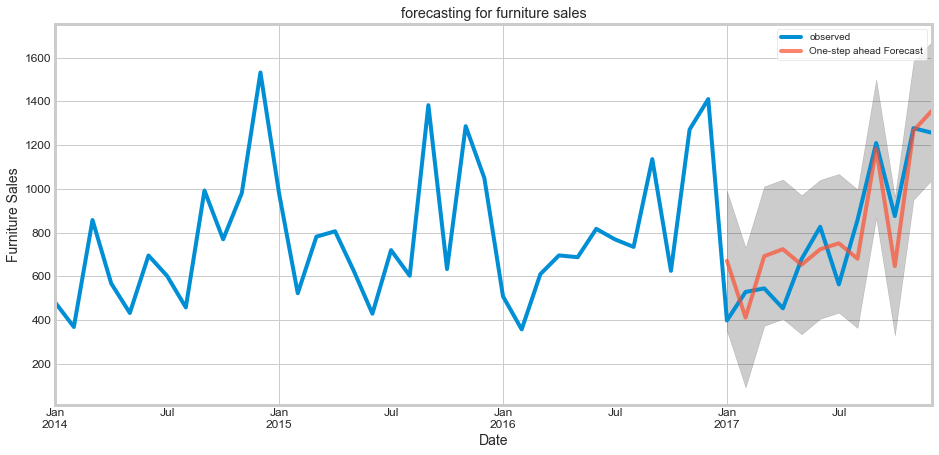

In [122]:
##forecasting for furniture sales
pred1 = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci1 = pred1.conf_int()

ax = y1_mn['2014':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.title("forecasting for furniture sales")
plt.show()

In [123]:
y1_mn_forecasted = pred1.predicted_mean
y1_mn_truth = y1_mn['2017-01-01':]
print(y1_mn_forecasted)
print(y1_mn_truth)

Order Date
2017-01-01     670.801992
2017-02-01     410.990604
2017-03-01     691.993738
2017-04-01     724.013918
2017-05-01     652.715361
2017-06-01     723.382434
2017-07-01     750.742972
2017-08-01     680.371309
2017-09-01    1183.856585
2017-10-01     646.712107
2017-11-01    1266.362993
2017-12-01    1358.463140
Freq: MS, Name: predicted_mean, dtype: float64
Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


In [124]:
y1_mn_forecasted = pred1.predicted_mean
y1_mn_truth = y1_mn['2017-01-01':]

mse1 = ((y1_mn_forecasted - y1_mn_truth) ** 2).mean()
print('The Mean Squared Error of furniture forecasts is {}'.format(round(mse1, 4)))

The Mean Squared Error of furniture forecasts is 27090.4981


In [125]:
print('The Root Mean Squared Error of furniture forecasts is {}'.format(round(np.sqrt(mse1), 2)))

The Root Mean Squared Error of furniture forecasts is 164.59


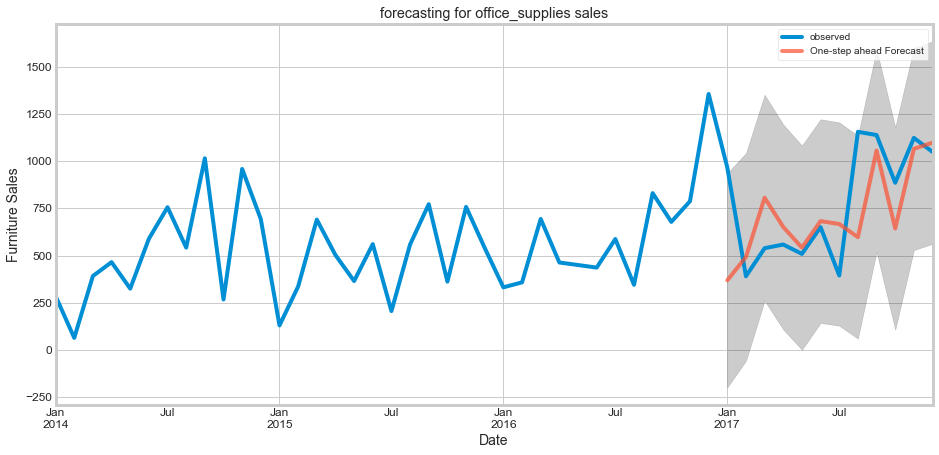

In [126]:
##forecasting for office_supplies sales
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci2 = pred2.conf_int()

ax = y2_mn['2014':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.title("forecasting for office_supplies sales")
plt.show()

In [127]:
y2_mn_forecasted = pred2.predicted_mean
y2_mn_truth = y2_mn['2017-01-01':]
print(y2_mn_forecasted)
print(y2_mn_truth)

Order Date
2017-01-01     368.354216
2017-02-01     492.162836
2017-03-01     806.621065
2017-04-01     651.233076
2017-05-01     541.780842
2017-06-01     682.664002
2017-07-01     666.996317
2017-08-01     597.339596
2017-09-01    1056.855607
2017-10-01     643.257610
2017-11-01    1065.874825
2017-12-01    1098.723515
Freq: MS, Name: predicted_mean, dtype: float64
Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64


In [128]:
y2_mn_forecasted = pred2.predicted_mean
y2_mn_truth = y2_mn['2017-01-01':]

mse2 = ((y2_mn_forecasted - y2_mn_truth) ** 2).mean()
print('The Mean Squared Error of office-supplies forecasts is {}'.format(round(mse2, 4)))

The Mean Squared Error of office-supplies forecasts is 75805.5025


In [129]:
print('The Root Mean Squared Error of office-supplies forecasts is {}'.format(round(np.sqrt(mse2), 2)))

The Root Mean Squared Error of office-supplies forecasts is 275.33


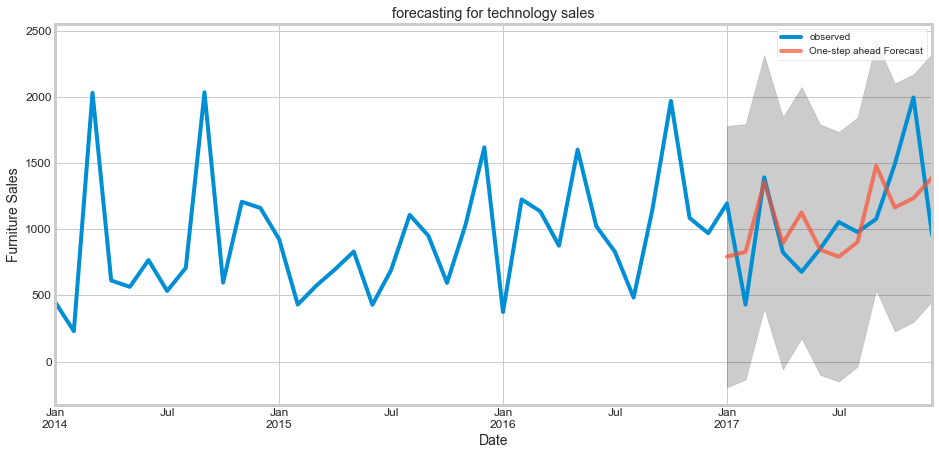

In [130]:
##forecasting for technology sales
pred3 = results3.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci3 = pred3.conf_int()

ax = y3_mn['2014':].plot(label='observed')
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.title("forecasting for technology sales")
plt.show()

In [131]:
y3_mn_forecasted = pred3.predicted_mean
y3_mn_truth = y3_mn['2017-01-01':]
print(y3_mn_forecasted)
print(y3_mn_truth)

Order Date
2017-01-01     792.989888
2017-02-01     829.742398
2017-03-01    1358.132995
2017-04-01     894.709922
2017-05-01    1126.602453
2017-06-01     845.643003
2017-07-01     792.661441
2017-08-01     903.583475
2017-09-01    1480.058353
2017-10-01    1164.822235
2017-11-01    1235.455295
2017-12-01    1392.208386
Freq: MS, Name: predicted_mean, dtype: float64
Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


In [132]:
y3_mn_forecasted = pred3.predicted_mean
y3_mn_truth = y3_mn['2017-01-01':]

mse3 = ((y3_mn_forecasted - y3_mn_truth) ** 2).mean()
print('The Mean Squared Error of technology forecasts is {}'.format(round(mse3, 4)))

The Mean Squared Error of technology forecasts is 136874.9803


In [133]:
print('The Root Mean Squared Error of technology forecasts is {}'.format(round(np.sqrt(mse3), 2)))

The Root Mean Squared Error of technology forecasts is 369.97


# visualizing forecasts

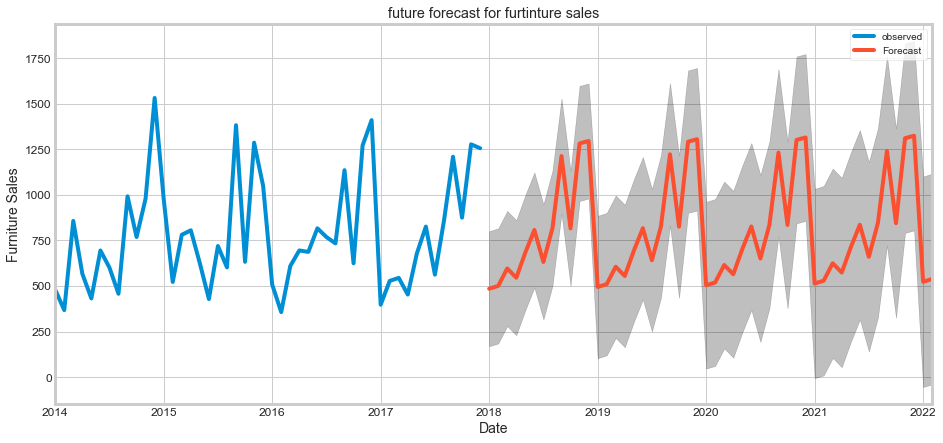

In [134]:
pred_uc1 = results.get_forecast(steps=50)
pred_ci1 = pred_uc1.conf_int()

ax = y1_mn.plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.title("future forecast for furtinture sales")
plt.show()

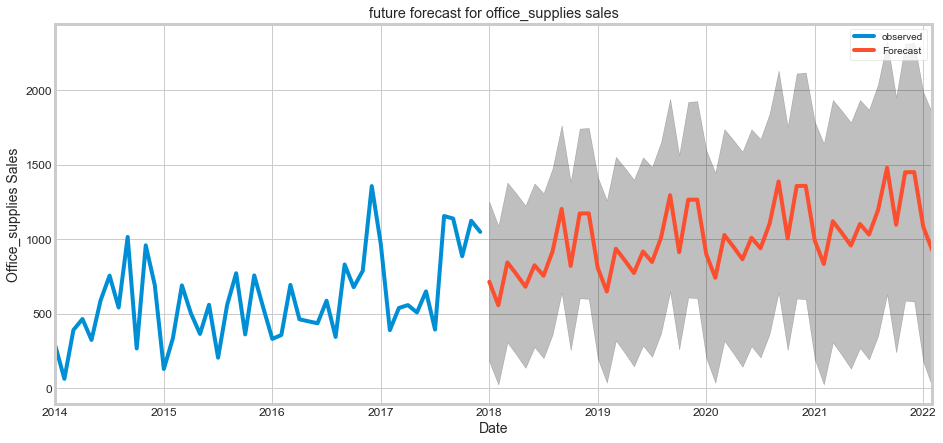

In [135]:
pred_uc2 = results2.get_forecast(steps=50)
pred_ci2 = pred_uc2.conf_int()

ax = y2_mn.plot(label='observed', figsize=(14, 7))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office_supplies Sales')

plt.legend()
plt.title("future forecast for office_supplies sales")
plt.show()

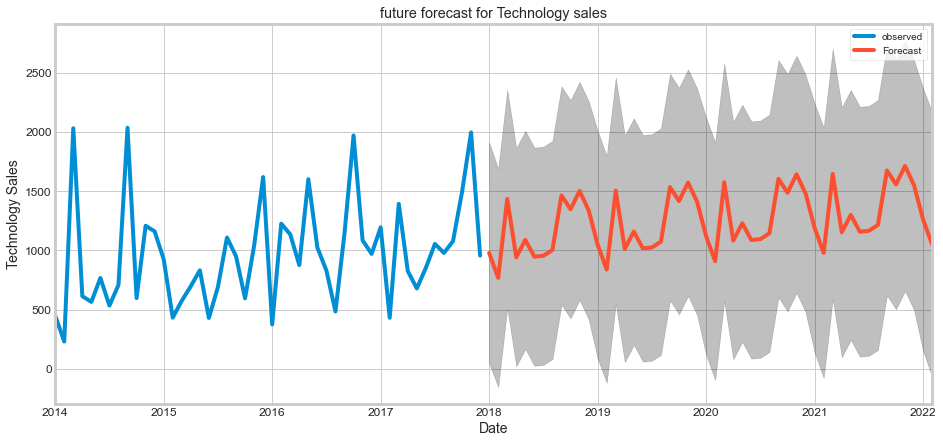

In [136]:
pred_uc3 = results3.get_forecast(steps=50)
pred_ci3 = pred_uc3.conf_int()

ax = y3_mn.plot(label='observed', figsize=(14, 7))
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci3.index,
                pred_ci3.iloc[:, 0],
                pred_ci3.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')

plt.legend()
plt.title("future forecast for Technology sales")
plt.show()

# casuality checking

In [137]:
office_supplies = office_supplies.iloc[3:]
office_supplies.head()

,Sales
Order Date,
2014-01-06,685.340
2014-01-07,10.430
2014-01-09,9.344
2014-01-10,2.890
2014-01-13,2027.116


In [138]:
furniture = furniture['Sales'].resample('MS').mean()
furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [139]:
office_supplies = office_supplies['Sales'].resample('MS').mean()
office_supplies

Order Date
2014-01-01     323.359714
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504187
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

In [140]:
technology = technology['Sales'].resample('MS').mean()
technology

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

In [141]:
a=pd.Series(["2014-01-01","2014-02-01","2014-03-01","2014-04-01","2014-05-01","2014-06-01","2014-07-01","2014-08-01","2014-09-01","2014-10-01","2014-11-01","2014-12-01",
             "2015-01-01","2015-02-01","2015-03-01","2015-04-01","2015-05-01","2015-06-01","2015-07-01","2015-08-01","2015-09-01","2015-10-01","2015-11-01","2015-12-01",
             "2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01",
             "2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01"], name="Order Date")
b=pd.Series(["480.194231","367.931600","857.291529","567.488357","432.049188","695.059242","601.169500","457.521656","992.353367","769.015437","980.221486","1532.298325",
             "978.328467","522.395667","781.236437","805.822962","624.996700","428.565500","719.706316","602.412012","1382.790684","632.980184","1286.701354","1049.355418",
             "508.182867","356.868273","609.575810","695.373158","687.265227","816.910750","768.736412","734.307782","1135.953371","624.872474","1271.345152","1410.719808",
             "397.602133","528.179800","544.672240","453.297905","678.302328","826.460291","562.524857","857.881889","1209.508583","875.362728","1277.817759","1256.298672"], name="furniture")
c=pd.Series(["323.359714","63.042588","391.176318","464.794750","324.346545","588.774409","756.060400","541.879143","1015.677704","267.078815","959.372714","692.556231",
             "129.198571","335.504187","690.545522","502.342320","364.549440","560.407737","205.214739","558.814667","772.230680","361.392083","757.790357","540.055800",
             "331.230125","357.597368","693.877240","462.932478","449.489724","436.072400","587.474727","344.605385","830.847786","678.408083","787.972231","1357.055929",
             "967.013136","389.882737","538.899481","558.229296","508.776444","650.463038","393.902615","1156.148154","1139.137250","886.045846","1124.012036","1049.549724"], name="office_supplies")
d=pd.Series(["449.041429","229.787143","2031.948375","613.028933","564.698588","766.905909","533.608933","708.435385","2035.838133","596.900900","1208.056320","1160.732889",
             "925.070800","431.121250","574.662333","697.559500","831.642857","429.024400","691.397733","1108.902286","950.856400","594.716111","1037.982652","1619.637636",
             "374.671067","1225.891400","1135.150105","875.911882","1601.816167","1023.259500","829.312500","483.620100","1144.170300","1970.835875","1085.642360","970.554870",
             "1195.218071","430.501714","1392.859250","825.559133","678.329400","853.055000","1054.996636","978.842333","1077.704120","1493.439227","1996.750920","955.865652"], name="technology")
a=pd.DataFrame(a)
df=a.join(b)
df=df.join(c)
df=df.join(d)
df

,Order Date,furniture,office_supplies,technology
0,2014-01-01,480.194231,323.359714,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588
5,2014-06-01,695.059242,588.774409,766.905909
6,2014-07-01,601.169500,756.060400,533.608933
7,2014-08-01,457.521656,541.879143,708.435385
8,2014-09-01,992.353367,1015.677704,2035.838133
9,2014-10-01,769.015437,267.078815,596.900900


In [142]:
import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y/%m/%d')
df

,Order Date,furniture,office_supplies,technology
0,2014-01-01,480.194231,323.359714,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588
5,2014-06-01,695.059242,588.774409,766.905909
6,2014-07-01,601.169500,756.060400,533.608933
7,2014-08-01,457.521656,541.879143,708.435385
8,2014-09-01,992.353367,1015.677704,2035.838133
9,2014-10-01,769.015437,267.078815,596.900900


In [143]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

In [144]:
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [145]:
df

,furniture,office_supplies,technology
Order Date,,,
2014-01-01,480.194231,323.359714,449.041429
2014-02-01,367.931600,63.042588,229.787143
2014-03-01,857.291529,391.176318,2031.948375
2014-04-01,567.488357,464.794750,613.028933
2014-05-01,432.049188,324.346545,564.698588
2014-06-01,695.059242,588.774409,766.905909
2014-07-01,601.169500,756.060400,533.608933
2014-08-01,457.521656,541.879143,708.435385
2014-09-01,992.353367,1015.677704,2035.838133


In [146]:
max_lags=5

In [147]:
###granger causality checking when y=furniture ,x=office supplies
results_12=grangercausalitytests(df[['furniture','office_supplies']], max_lags, verbose=False) #max_lags=5
results_12

{1: ({'ssr_ftest': (1.1226323202078294, 0.2951342953551579, 44.0, 1),
   'ssr_chi2test': (1.1991754329492723, 0.2734865449710473, 1),
   'lrtest': (1.1841326639973886, 0.27651627038711163, 1),
   'params_ftest': (1.1226323202078274, 0.2951342953551579, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4608918630219962, 0.6339487118464782, 41.0, 2),
   'ssr_chi2test': (1.0341963755615524, 0.5962482404681366, 2),
   'lrtest': (1.0227420635162616, 0.5996728444294572, 2),
   'params_ftest': (0.4608918630219949, 0.6339487118464782, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6407622128686158, 0.5935145621701238, 38.0, 3),
   'ssr_chi2test': (2.2763920720332402, 0.5170586399062969, 3),
   'lrtest': (2.2206856771173307, 0.5278854390886545, 3),
   'params_ftest': (0.6407622128686291, 0.5935145621701152, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [148]:
###granger causality checking when y=furniture ,x=office supplies
p_values_12=[round(results_12[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_12))

P Values per lag - [0.2951, 0.6339, 0.5935, 0.7762, 0.6253]


In [149]:
###granger causality checking when y=furniture ,x=technology
results_13=grangercausalitytests(df[['furniture','technology']], max_lags, verbose=False) #max_lags=5
results_13

{1: ({'ssr_ftest': (1.2877223776187317, 0.26261238849317914, 44.0, 1),
   'ssr_chi2test': (1.3755216306381906, 0.24086545192323058, 1),
   'lrtest': (1.3557776342697707, 0.24427059696615344, 1),
   'params_ftest': (1.2877223776046574, 0.2626123884957518, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6531453204838217, 0.5257358778331194, 41.0, 2),
   'ssr_chi2test': (1.4655943776710143, 0.480562883178695, 2),
   'lrtest': (1.4427312675426265, 0.4860879843200985, 2),
   'params_ftest': (0.6531453205041534, 0.5257358778227592, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7784297906659529, 0.513346713639736, 38.0, 3),
   'ssr_chi2test': (2.765474256313254, 0.4292150499023959, 3),
   'lrtest': (2.6838266783717017, 0.44298278165332783, 3),
   'params_ftest': (0.7784297906659555, 0.5133467136397356, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [150]:
###granger causality checking when y=furniture ,x=technology
p_values_13=[round(results_13[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_13))

P Values per lag - [0.2626, 0.5257, 0.5133, 0.5408, 0.4203]


In [151]:
###granger causality checking when y=office supplies ,x=furniture
results_21=grangercausalitytests(df[['office_supplies','furniture']], max_lags, verbose=False) #max_lags=5
results_21

{1: ({'ssr_ftest': (0.0733324848372348, 0.7878114107620375, 44.0, 1),
   'ssr_chi2test': (0.07833242698522808, 0.7795701029580778, 1),
   'lrtest': (0.07826722315599, 0.7796594952742831, 1),
   'params_ftest': (0.07333248484196316, 0.7878114107553709, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.1381699202773197, 0.8713545103285579, 41.0, 2),
   'ssr_chi2test': (0.3100398211100832, 0.8563981259518371, 2),
   'lrtest': (0.30899965869377866, 0.8568436383651165, 2),
   'params_ftest': (0.13816992027732242, 0.8713545103285559, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.11863445477783632, 0.9486047456594415, 38.0, 3),
   'ssr_chi2test': (0.4214645103949448, 0.935773594608694, 3),
   'lrtest': (0.419503055454129, 0.93618479732029, 3),
   'params_ftest': (0.1186344547778369, 0.9486047456594406, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [152]:
###granger causality checking when y=office supplies ,x=furniture
p_values_21=[round(results_21[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_21))

P Values per lag - [0.7878, 0.8714, 0.9486, 0.9751, 0.9263]


In [153]:
###granger causality checking when y=office supplies ,x=technology
results_23=grangercausalitytests(df[['office_supplies', 'technology']], max_lags, verbose=False) #max_lags=5
results_23

{1: ({'ssr_ftest': (6.285552702333302e-06, 0.9980109579607105, 44.0, 1),
   'ssr_chi2test': (6.714113113856027e-06, 0.9979325552979389, 1),
   'lrtest': (6.714112714689691e-06, 0.9979325553593955, 1),
   'params_ftest': (6.285552743769937e-06, 0.9980109579537543, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2422944147723569, 0.7859408607171718, 41.0, 2),
   'ssr_chi2test': (0.5436850282696789, 0.7619742518154452, 2),
   'lrtest': (0.5404971506960692, 0.7631897605959083, 2),
   'params_ftest': (0.2422944147761625, 0.7859408607142162, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3204213937329201, 0.8105335552136863, 38.0, 3),
   'ssr_chi2test': (1.1383391619459002, 0.7678278364189512, 3),
   'lrtest': (1.124179501690719, 0.7712404941885798, 3),
   'params_ftest': (0.32042139372981443, 0.810533555215912, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [154]:
###granger causality checking when y=office supplies ,x=technology
p_values_23=[round(results_23[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_23))

P Values per lag - [0.998, 0.7859, 0.8105, 0.81, 0.6444]


In [155]:
###granger causality checking when y=technology ,x=furniture
results_31=grangercausalitytests(df[['technology', 'furniture']], max_lags, verbose=False) #max_lags=5
results_31 

{1: ({'ssr_ftest': (0.6200415880097158, 0.4352531711516423, 44.0, 1),
   'ssr_chi2test': (0.66231715082856, 0.4157430918798344, 1),
   'lrtest': (0.657693895312832, 0.417375267380405, 1),
   'params_ftest': (0.620041588004277, 0.43525317115364104, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4460136408657927, 0.6432441127949126, 41.0, 2),
   'ssr_chi2test': (1.0008110965769006, 0.6062847321128235, 2),
   'lrtest': (0.9900792725175052, 0.6095467466649214, 2),
   'params_ftest': (0.4460136408657952, 0.6432441127949096, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.38836103977732356, 0.7620170803871579, 38.0, 3),
   'ssr_chi2test': (1.3797036939457548, 0.7102991183736884, 3),
   'lrtest': (1.3589754019462816, 0.7151786588258979, 3),
   'params_ftest': (0.38836103977737463, 0.7620170803871208, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

In [156]:
###granger causality checking when y=technology ,x=furniture
p_values_31=[round(results_31[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_31))

P Values per lag - [0.4353, 0.6432, 0.762, 0.7089, 0.8634]


In [157]:
###granger causality checking when y=technology ,x=office_supplies
results_32=grangercausalitytests(df[['technology', 'office_supplies']], max_lags, verbose=False) #max_lags=5
results_32

{1: ({'ssr_ftest': (0.9195733000556904, 0.34282700311723935, 44.0, 1),
   'ssr_chi2test': (0.982271479604942, 0.3216386571376494, 1),
   'lrtest': (0.9721478495330302, 0.32414509500315536, 1),
   'params_ftest': (0.9195733000241991, 0.3428270031254185, 44.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.7565682649429575, 0.1853792082744395, 41.0, 2),
   'ssr_chi2test': (3.941567814018344, 0.13934757784562277, 2),
   'lrtest': (3.7817649638516286, 0.15093854950369714, 2),
   'params_ftest': (1.7565682649429422, 0.18537920827444224, 41.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.1363990234580252, 0.11166999676377946, 38.0, 3),
   'ssr_chi2test': (7.5898386359693, 0.05529449434741207, 3),
   'lrtest': (7.013719326854471, 0.07146177406590985, 3),
   'params_ftest': (2.1363990234576473, 0.11166999676382731, 38.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [158]:
###granger causality checking when y=technology ,x=office_supplies
p_values_32=[round(results_32[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('P Values per lag - '+str(p_values_32))

P Values per lag - [0.3428, 0.1854, 0.1117, 0.167, 0.3111]
